<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2022/23 Term 2
</div>

# CS105 Group Project Submission
-----------

#### Section: G1
#### Team: Group 8
#### Members:
1. Kevin
2. Kumaresh
3. Teffy
4. Jun Jie
5. Melanie

#### Dataset: 

In [ ]:
# Codes Used To Import Pandas And Associated Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from IPython.display import HTML, display

url = "https://raw.githubusercontent.com/losttechienomad/105ProjectDataset/main/climate.csv"

df = pd.read_csv(url)

# Seeing what the data looks like when put into the tables
display(df)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137
3,1983,8,1.130,NaN,1631.35,L,193.602,355.633,M,H,0.176
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,L,244.200,535.072,L,L,0.407
304,2008,9,-0.643,383.09,1795.08,L,244.083,535.048,L,M,0.378
305,2008,10,-0.780,382.99,1814.18,L,244.080,534.927,L,M,0.440
306,2008,11,1.345,384.13,1812.37,L,244.225,534.906,L,M,0.394


# 1. Overview of Dataset
## Summary
- The dataset contains climate or atmospheric data, and can be can be utilized to explore how different factors affect the average global temperature.
- Each row corresponds to climate or atmospheric data captured for a given month. 

## Size
The dataset contains 308 rows and 11 columns.

In [ ]:
# Getting the number of rows and columns, storing into variables
n_rows, n_cols = df.shape

print(f"Number of rows is {n_rows}")
print(f"Number of columns is {n_cols}")

Number of rows is 308
Number of columns is 11


## Data Dictionary

The table below shows a brief description and details about the dataset and the variables used.

| Column | Description | Data Type | Details |
| ------ | ----------- | -------- | ------- |
| Year   | Year of observation | Categorical |        |
| Month  | Month of observation | Categorical |        |
| MEI    | Multivariate El Nino Southern Oscillation index (MEI) | Numerical | A measure of the strength of the El Nino/La Nina-Southern Oscillation |
| CO2    | Atmospheric concentration of carbon dioxide | Numerical | Measured in parts per million by volume |
| CH4    | Atmospheric concentration of methane | Numerical | Measured in parts per million by volume |
| N2O    | Level of atmospheric concentration of nitrous oxide | Categorical | Possible values: “H”, “L” |
| CFC-11 | Atmospheric concentration of trichlorofluoromethane | Numerical | Measured in parts per billion by volume |
| CFC-12 | Atmospheric concentration of dichlorodifluoromethane | Numerical | Measured in parts per billion by volume |
| TSI    | Level of Total Solar Irradiance. TSI is the rate at which sun's energy is deposited per unit area | Categorical | Possible values: “H”, “M”, “L” |
| Aerosols | Level of stratospheric “aerosol optical depth” at 550nm. This is linked to volcanoes, as eruptions result in new particles added to atmosphere | Categorical | Possible values: “H”, “M”, “L” |
| Temp   | Difference in temperature between average global temperature and a reference value | Numerical |        |


In [ ]:
# Checking the different datatypes for the variables provided
print(df.dtypes)

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O          object
CFC-11      float64
CFC-12      float64
TSI          object
Aerosols     object
Temp        float64
dtype: object


# 2. Data Pre-processing

## Missing data
#### Observations
- TSI and CO2 contain null values.



In [ ]:
# Percentage of missing values per column
print("Percentages of missing values per column:")
print(100 - df.count() * 100 / n_rows)

Percentages of missing values per column:
Year        0.000000
Month       0.000000
MEI         0.000000
CO2         6.493506
CH4         0.000000
N2O         0.000000
CFC-11      0.000000
CFC-12      0.000000
TSI         6.168831
Aerosols    0.000000
Temp        0.000000
dtype: float64


#### TSI
- About 6.16% of the data in the TSI row was missing. 
- This was resolved by imputing the most frequent value (mode) for each instance of null value in the TSI column.
- In the dataset, the majority of TSI values was M, thus we chose to impute the null columns with M.
- We assumed that for the entries with missing TSI values, the level of TSI at the time and place that the data was gathered would correspond to the most common level and that the mode will not change over time as more values are added to the dataset.
- We also assumed that the null values missing from the table were random, and not as a result of an independent event, such as a sensor malfunction, which would result in the loss of data over a specific period of time.

In [ ]:
# Finding the distribution of TSI values in the dataset
df.TSI.value_counts()

M    150
L     88
H     51
Name: TSI, dtype: int64

In [ ]:
# Store most common value of tsi
tsi_mode = df.TSI.mode()[0]

# Fill in missing values using computed mode of TSI column
df.TSI.fillna(tsi_mode, inplace=True)

#### CO2

- About 6.49% of the data in the CO2 row was missing.
- This was resolved by dropping the rows with missing CO2 values.
- We assumed that there is no possible way to impute the CO2 values, as CO2 varies greatly according to atmospheric factors (eg. burning of fossil fuels) that we cannot factor into our calculations. Given that the missing percentage of CO2 values is also not too high, a small proportion of the dataset will be affected.

In [ ]:
# Drop rows with missing CO2 values
df.dropna(subset=["CO2"], inplace= True)

## Encoding
#### Observations
- N2O, TSI and Aerosols contain categorical data that can be mapped to 2 or 3 distinct values, corresponding to their levels (H, M, L).

#### TSI
- As TSI contained categorical values and the order of the categories need to be maintained, we performed ordinal encoding by assigning 2, 1 and 0 to the different levels (H, M and L respectively).


In [ ]:
# Perform ordinal encoding for TSI
encoding = {'L': 0, 'M': 1, 'H': 2}
df["TSI_Encoded"] = df["TSI"].map(encoding)

#### Aerosols

- Similar to TSI, as Aerosols only contained categorical values and the order needs to be maintained, we performed ordinal encoding corresponding to H, M and L respectively.

In [ ]:
# Perform ordinal encoding for Aerosols
encoding = {'L': 0, 'M': 1, 'H': 2}
df["Aerosols_Encoded"] = df["Aerosols"].map(encoding)

#### N2O

- As N2O only contained two categorical values  we binary encoding corresponding to H and L respectively.
- H = 1, L = 0

In [ ]:
# Perform binary encoding for N2O
encoding = {"H":1, "L":0}
df["N2O_Encoded"] = df["N2O"].map(encoding)

# The updated dataframe with the encoded values
display(df)

# reassign n_rows and n_cols
n_rows, n_cols = df.shape

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,TSI_Encoded,Aerosols_Encoded,N2O_Encoded
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109,1,2,0
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118,1,2,0
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137,1,2,0
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149,1,2,0
5,1983,10,0.002,340.30,1663.79,L,195.171,359.174,M,H,0.093,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,L,244.200,535.072,L,L,0.407,0,0,0
304,2008,9,-0.643,383.09,1795.08,L,244.083,535.048,L,M,0.378,0,1,0
305,2008,10,-0.780,382.99,1814.18,L,244.080,534.927,L,M,0.440,0,1,0
306,2008,11,1.345,384.13,1812.37,L,244.225,534.906,L,M,0.394,0,1,0


## Outliers
#### Observations
- Through plotting a boxplot, we found that the datasets for MEI, CFC-11 and CFC-12 all contain outliers.
- The criteria that we used to determine whether certain values were outliers or not was whether they landed either above the upper whisker or below the lower whisker.
- This can be seen through the black circles that appear in the boxplot diagrams.
- We also looked at the histograms in order to gain a better understanding on the distribution of values for each datatype.



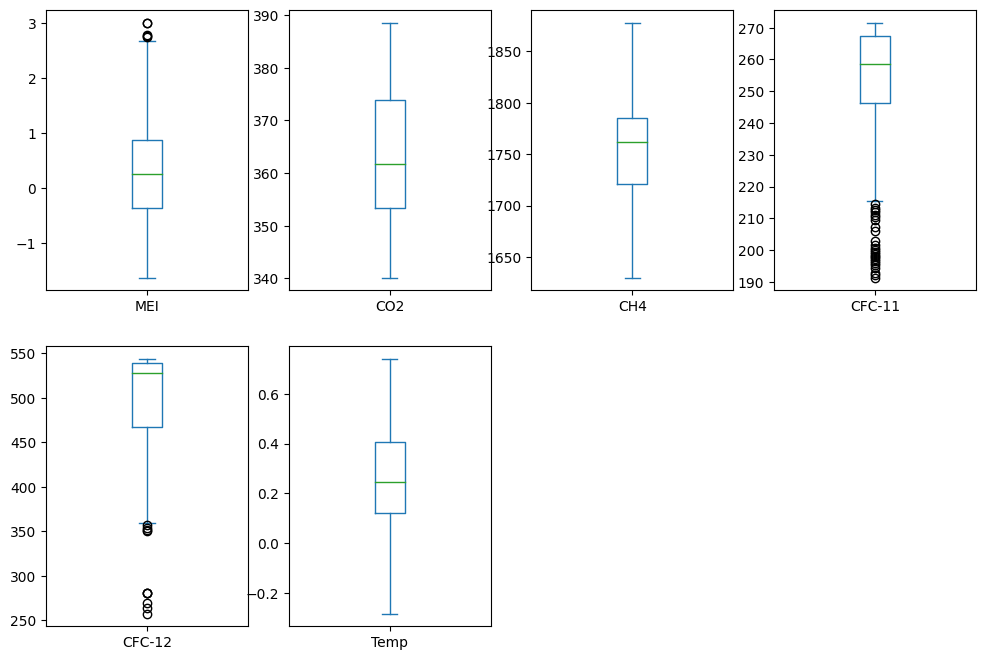

In [ ]:
# Plot boxplots to find numerical outliers (if any)
df_numerics = df[["MEI","CO2","CH4","CFC-11","CFC-12","Temp"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(12, 8))
plt.show()

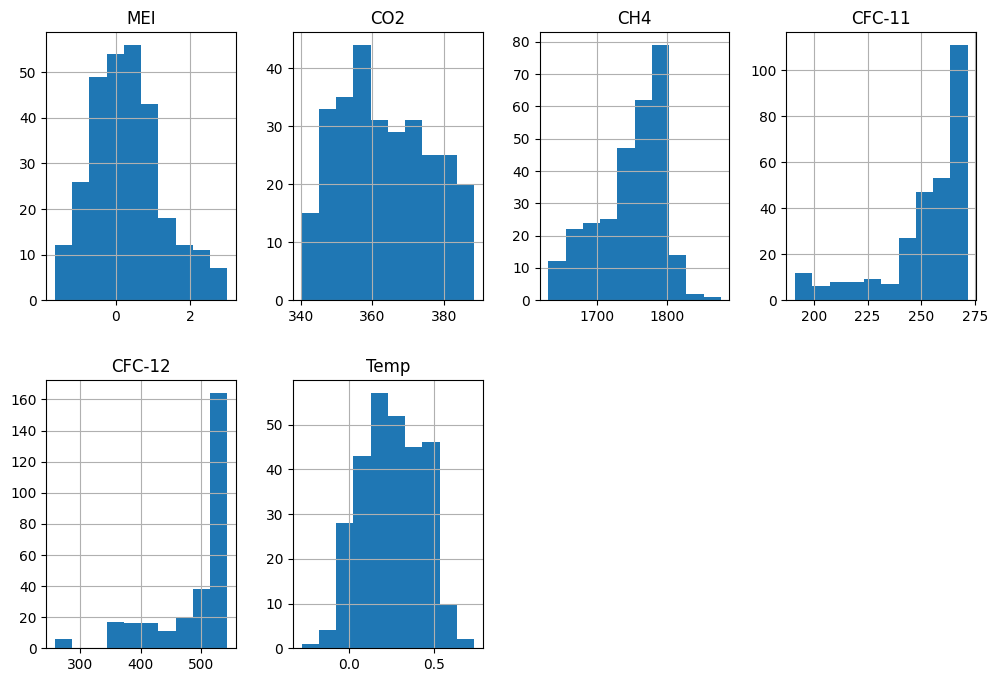

In [ ]:
# Plotting histograms to show the rough distribution of the dataset
df_numerics.hist(layout=(2, 4), figsize=(12, 8))
plt.show()

In [ ]:
# Finding percentiles for MEI
q1, q3 = np.percentile(df["MEI"], [25 , 75])
iqr = q3 - q1
mei_lower_whisker = q1 - 1.5*iqr
mei_upper_whisker = q3 + 1.5*iqr

# Obtaining and printing MEI outlier percentage
mei_outliers_percentage = (df[(df["MEI"] < mei_lower_whisker) | (df["MEI"] > mei_upper_whisker)].shape[0]) * 100 / n_rows
print("Percentage of outlier MEI values is %f" % (mei_outliers_percentage))

# Finding percentiles for CFC-11
q1, q3 = np.percentile(df["CFC-11"], [25 , 75])
iqr = q3 - q1
cfc11_lower_whisker = q1 - 1.5*iqr
cfc11_upper_whisker = q3 + 1.5*iqr

# Obtaining and printing CFC-11 outlier percentage
cfc_11_percentage = (df[(df["CFC-11"] < cfc11_lower_whisker) | (df["CFC-11"] > cfc11_upper_whisker)].shape[0]) * 100 / n_rows
print("Percentage of outlier CFC-11 values is %f" % (cfc_11_percentage))

# Finding percentiles for CFC-12
q1, q3 = np.percentile(df["CFC-12"], [25 , 75])
iqr = q3 - q1
cfc12_lower_whisker = q1 - 1.5*iqr
cfc12_upper_whisker = q3 + 1.5*iqr

# Obtaining and printing CFC-12 outlier percentage
cfc_12_percentage = (df[(df["CFC-12"] < cfc12_lower_whisker) | (df["CFC-12"] > cfc12_upper_whisker)].shape[0]) * 100 / n_rows
print("Percentage of outlier CFC-12 values is %f" % (cfc_12_percentage))

Percentage of outlier MEI values is 1.736111
Percentage of outlier CFC-11 values is 8.680556
Percentage of outlier CFC-12 values is 3.472222


#### Resolving the outliers for MEI, CFC-11 and CFC-12
- We added additional columns to the table to indicate whether the values were outliers or not.
- We encoded the values using binary encoding.
- Not an outlier = 0, outlier = 1
- This was done in order to ascertain the percentage of outliers, as well as hasten the process if we wanted to drop the outlier values in the future.

#### MEI
- About 1.74% of the data were outliers. 
- This was resolved by dropping the outlier data.
- From the histogram, we noticed that the MEI dataset has a central tendency and a relatively normal distribution. 
- From the dataset itself, we noticed that the MEI values were inconsistent from year to year, as well as month to month. Thus, it is less likely that the outliers are caused by a certain trend or significant environmental factor, but instead could be caused by measurement errors.
- We felt that the outliers were insignificant when it comes to affecting the overall shape of the MEI graph, and thus felt that it was reasonable to drop them as they would not significantly affect the database.

In [ ]:
# Dropping rows containing MEI outliers
df = df.drop(df[(df["MEI"] < mei_lower_whisker) | (df["MEI"] > mei_upper_whisker)].index)

#### CFC-11
- About 8.68% of the data were outliers. 
- This was resolved by dropping the outlier data.
- From the histogram, we noticed that the data was skewed to the right, due to the prevalence of extremely high values in the dataset, which resulted in wrongly identifying outliers in the dataset.
- From the dataset itself, we noticed that the CFC-11 values increased gradually over time and did not fluctuate.
- This meant that these outliers are not due to measurement errors and are in fact representative of the CFC-11 values in earlier years.
- We felt that it would be more accurate to leave the CFC-11 values in the table so as to account for the CFC-11 levels rising due to environmental factors such as industrialisation.

In [ ]:
# Displaying outliers for CFC-11
cfc11_outliers = df.loc[df[(df["CFC-11"] < cfc11_lower_whisker) | (df["CFC-11"] > cfc11_upper_whisker)].index]

display(cfc11_outliers)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,TSI_Encoded,Aerosols_Encoded,N2O_Encoded
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109,1,2,0
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118,1,2,0
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137,1,2,0
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149,1,2,0
5,1983,10,0.002,340.30,1663.79,L,195.171,359.174,M,H,0.093,1,2,0
6,1983,11,-0.176,341.53,1658.23,L,195.921,360.758,M,H,0.232,1,2,0
7,1983,12,-0.176,343.07,1654.31,L,196.609,362.174,M,H,0.078,1,2,0
8,1984,1,-0.339,344.05,1658.98,L,197.219,363.359,L,H,0.089,0,2,0
9,1984,2,-0.565,344.77,1656.48,L,197.759,364.296,L,H,0.013,0,2,0
10,1984,3,0.131,345.46,1655.77,L,198.249,365.044,M,H,0.049,1,2,0


#### CFC-12
- About 3.47% of the data were outliers. 
- This was resolved by dropping the outlier data.
- From the histogram, we noticed that the data was skewed to the right, due to the prevalence of extremely high values in the dataset, which resulted in wrongly identifying outliers in the dataset.
- From the dataset itself, we noticed that the CFC-11 values increased gradually over time and did not fluctuate.
- This meant that these outliers are not due to measurement errors and are in fact representative of the CFC-11 values in earlier years.
- We felt that it would be more accurate to leave the CFC-11 values in the table so as to account for the CFC-11 levels rising due to environmental factors such as industrialisation.

In [ ]:
# displaying outliers for CFC-12
cfc12_outliers = df.loc[df[(df["CFC-12"] < cfc12_lower_whisker) | (df["CFC-12"] > cfc12_upper_whisker)].index]

display(cfc12_outliers)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,TSI_Encoded,Aerosols_Encoded,N2O_Encoded
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109,1,2,0
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118,1,2,0
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137,1,2,0
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149,1,2,0
73,1989,6,-0.273,355.30,1713.80,L,253.793,263.793,M,M,0.094,1,1,0
114,1992,11,0.602,354.27,1755.29,L,270.886,280.886,M,H,-0.097,1,2,0
132,1994,5,0.521,361.68,1755.04,L,270.691,280.691,M,H,0.218,1,2,0
133,1994,6,0.734,360.80,1746.61,L,270.516,280.516,M,M,0.191,1,1,0
227,2002,4,0.339,375.00,1782.47,L,259.574,269.574,H,L,0.443,2,0,0
287,2007,4,-0.049,386.40,1750.95,L,247.574,257.574,L,M,0.466,0,1,0


Afterwards, we reassigned the number of rows and columns (excluding the ones that we dropped in order to account for the MEI outliers).

In [ ]:
# Reassign n_rows and n_cols
n_rows, n_cols = df.shape

display(df)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,TSI_Encoded,Aerosols_Encoded,N2O_Encoded
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109,1,2,0
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118,1,2,0
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137,1,2,0
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149,1,2,0
5,1983,10,0.002,340.30,1663.79,L,195.171,359.174,M,H,0.093,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,L,244.200,535.072,L,L,0.407,0,0,0
304,2008,9,-0.643,383.09,1795.08,L,244.083,535.048,L,M,0.378,0,1,0
305,2008,10,-0.780,382.99,1814.18,L,244.080,534.927,L,M,0.440,0,1,0
306,2008,11,1.345,384.13,1812.37,L,244.225,534.906,L,M,0.394,0,1,0


# 3. Exploratory analysis and visualisation

## Summary

The main purpose of the exploratory analysis section would be to analyse and investigate the data collected and to get a "sneak peek" of the data before the actual data analysis process is done in the next phase. 

Below, we have included the basic summary statistics for the cleaned data that was created in Part 2. 

In [ ]:
df_numeric = df [["Year", "Month", "MEI", "CO2", "CH4", "CFC-12", "CFC-11", "Temp"]]
df_numeric.describe()

,Year,Month,MEI,CO2,CH4,CFC-12,CFC-11,Temp
count,283.000000,283.000000,283.000000,283.00000,283.000000,283.000000,283.000000,283.000000
mean,1995.717314,6.484099,0.261919,363.37000,1748.759011,492.668046,252.101106,0.250035
std,7.457536,3.494006,0.903936,12.77072,47.467140,65.734656,20.099813,0.176792
min,1983.000000,1.000000,-1.635000,340.17000,1629.890000,257.574000,191.324000,-0.282000
25%,1989.000000,3.500000,-0.391500,353.14500,1719.305000,463.462000,246.284000,0.120500
50%,1996.000000,6.000000,0.234000,361.68000,1761.940000,526.535000,258.289000,0.242000
75%,2002.000000,10.000000,0.828500,373.96500,1786.065000,539.838500,267.220000,0.403500
max,2008.000000,12.000000,2.673000,388.50000,1877.610000,543.647000,271.494000,0.651000


In [ ]:
n_rows, n_cols = df.shape
print(f"Number of rows is {n_rows}")
print(f"Number of columns is {n_cols}")

Number of rows is 283
Number of columns is 14


After data cleaning, there is now a total of 283 rows and 14 columns of data. 

The various data types are listed as shown:

In [ ]:
print(df.dtypes)

Year                  int64
Month                 int64
MEI                 float64
CO2                 float64
CH4                 float64
N2O                  object
CFC-11              float64
CFC-12              float64
TSI                  object
Aerosols             object
Temp                float64
TSI_Encoded           int64
Aerosols_Encoded      int64
N2O_Encoded           int64
dtype: object


Before we go into further exploratory data analysis, it is important to note the possible and known implications of each variable.

*   MEI - A positive MEI value indicates a strong El Niño event, while a negative MEI value indicates a strong La Niña event. El Niño affects the global climate and disrupts normal weather patterns, which as a result can lead to intense storms in some places and droughts in others.

*   CO2 - An increase in CO2 leads to an increase in the enhanced greenhouse effect, which contributes to global warming.

* CH4 - Methane (CH4) is the main component of natural gas and a potent greenhouse gas. Greenhouse gases slow the rate at which heat leaves the planet.

* CFCs - Chlorofluorocarbons (CFCs) break down the ozone layer via a series of chemical reactions. The ozone layer shields the earth from excessive ultraviolet (UV) rays from the sun which may be dangerous to life in excessive amounts.

* TSI -  Total Solar Irradiance (TSI) is the rate at which sun's energy is deposited per unit area, as described in the data dictionary. Most of the absorbed solar radiation is converted into thermal energy.

* Aerosols - Some aerosols can reflect sunlight back into space and lower solar radiation on earth. However, aerosols can also absorb and scatter incoming solar radiation, trapping heat in the atmosphere and warming the planet. Additionally, aerosols can also alter cloud properties, affecting the reflectivity and lifetime of clouds.

* N2O - is a powerful greenhouse gas. It is emitted from natural and anthropogenic sources, including soil, oceans, animal waste, and fossil fuel combustion. Like methane, it slows the rate at which heat leaves the planet.

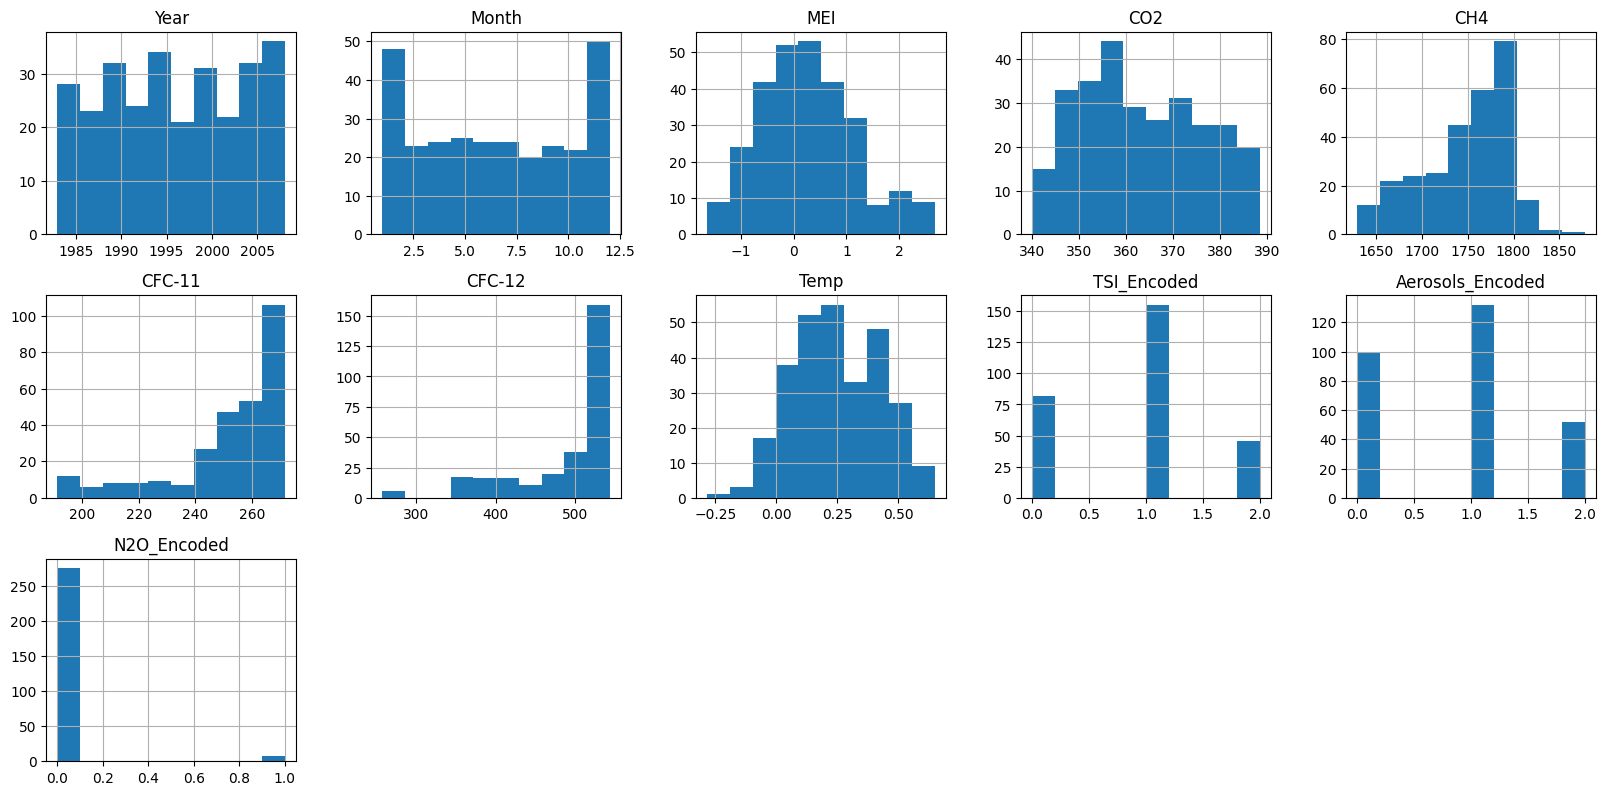

In [ ]:
# Histograms to help us discern the variation of the different attributes
df.hist(layout=(9,5), figsize=(20,30))

plt.show()

### Observations
Year: Starts from around 1982 to 2008
Month: Mostly evenly distributed, with more entries around January and December
MEI: Seems to be normally distributed, the median is around 0
CO2: Seems to be relatively evenly distributed, with more entries at around the 350 - 360 range
CH4: Seems to be a linear distribution, with CH4 increasing steadily and a steep drop observed after 1800
CFC-11: Seems to be a linear distribution, with CFC-11 increasing steadily
CFC-12: Seems to be an exponential graph, CFC-12 levels increase drastically 
Temp: Seems to be rather normally distributed, with the median being around 0.25
TSI: Majority of the TSI levels observed is M
Aerosols: The highest number of aerosol levels observed is M
N2O: A large percentage of N2O levels observed is L

## Overall Data Visualisation

We can get a rough visualisation of the overall correlations between variables via a heatmap.

In [ ]:
features = df.select_dtypes(include='number').columns.tolist()

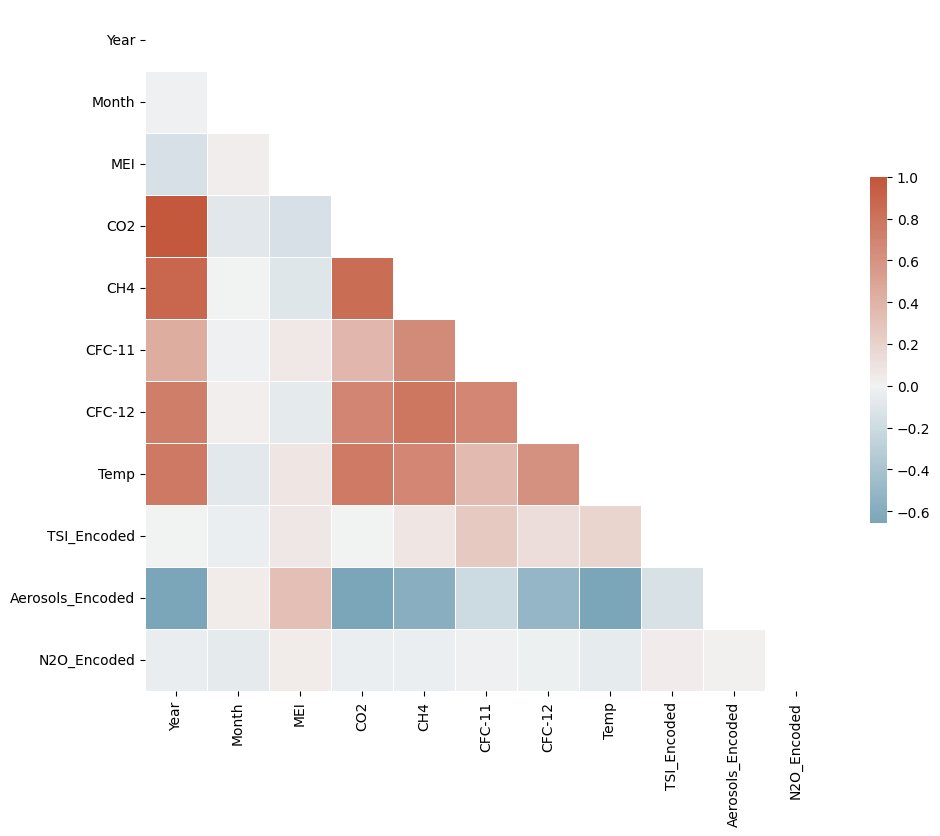

In [ ]:
# Compute the correlation matrix
corr = df[features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

plt.show()

The heatmap above displays a color-coded matrix with correlation values ranging from -1 to 1. The values in the diagonal are always 1 since each feature is perfectly correlated with itself.

* The upper triangle of the matrix is masked out because it is a duplicate of the lower triangle.

* The heatmap shows which variables are positively or negatively correlated with each other. Red cells indicate a positive correlation while blue cells indicate a negative correlation between variables.

* The 'vmax' parameter is set to 1.0, indicating that the maximum correlation value shown in the heatmap is 1.0.

At a quick glance, we can see that there is a significant positive correlation in CO2, CH4, CFC-12 and Temp with the passage of years. There are also strong positive correlations between CO2, CH4, CFC-12 and Temp.

We also observe a significant decrease in Aerosols_H and Aerosols_M with the passage of years.

These correlations will be further analysed in following cells below.

# Bi-variate Analysis

##Bivariate Analysis Of Relationship Between Temperature And CO2

In this section, we are keen to investigate the relationship between Temperature and CO2.

Both the data variables that are being reviewed are numerical and as such we will be using the numerical-numerical bivariate analysis method.

**Our working hypothesis would be that an increase in CO2 levels in the atmosphere would lead to a positive rate of change of temperature.**


**To start off the process, we have come out with a hypothesis for this relation that the increased level of CO2 in the atmosphere leads to an increased rate of temperature increase as denoted by the variable "Temp".**

Since temperature and CO2 are both numerical data as such we will be using the numerical - numerical bivariate analysis.

We made use of the crosstab method that was taught in the lab environment to tabulate the temperature changes in relation with the CO2 emmission levels and this is displayed in the table below.

<Axes: xlabel='CO2', ylabel='Temp'>

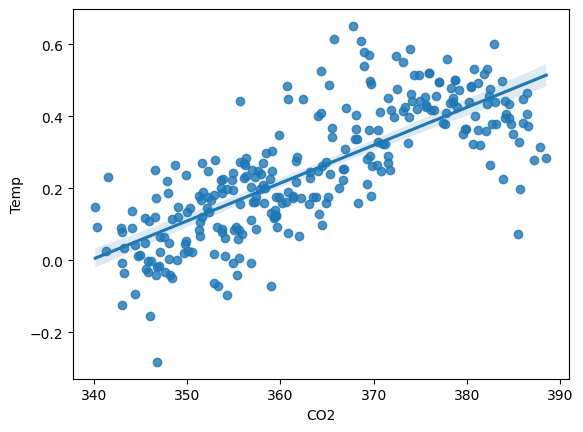

In [ ]:
#Extracting CO^2 and Temperature
sns.regplot(x=df["CO2"], y=df["Temp"])

Based on the scatter plot that was plotted above, we can proceed to make some basic intuitive interpretations of the data.
For this purpose, we would be using the scatterplot matrix to draw some interpretations of the data.

Based on the best-fit line that was plotted above, we can preliminarily tell that Temperature & CO2 levels are positively correlated. 

Regression Analysis For Bivariate Relationship Between Temp And CO2 Levels:

In the previous step we created a scatter plot using the two variables and from there we were able to tell that the two variables are positively correlated.
The next step would be to carry out regression analysis on the two data variables to investigate deeper into the underlying relationship between the two variables. 
The outcome of the above regression analysis would be to obtain the equation of the line and the correlation coefficient.

In [ ]:
#Creating A Linear Regression Object From scikit
lin = LinearRegression()
lin.fit(df[["CO2"]], df[["Temp"]])
lin.score(df[['CO2']], df['Temp'])

0.5771639763435237

Based on the regression analysis that was done above, we obtained a score (which is the r^2 value that was mentioned in class) of 0.577 which confirms that both the CO2 levels and temperature share some form of relationship with each other and has a variance of about 58%.

To confirm the regression analysis was done correctly, we use another plugin called 'statsmodel' to verify that the linear regression was done correctly.

In [ ]:
co2_temp_model = ols("CO2 ~ Temp", data=df).fit()
co2_temp_model_summary = co2_temp_model.summary()
HTML(
(co2_temp_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

To understand the output, we will zoom in on several key values:

<font color='#aec7e8'>Adjust R Squared: </font> Also known as the coefficient determination. Based on this we can tell that 57.6% of the changes in the "Temp" variable can be attributed to changes in CO2 levels.

<font color='#ffbb78'>Coefficient: </font> This value indicates that for every unit of increase in "Temp" there would be an increase of 54.8784% in CO2 levels recorded.

<font color='#c7e9c0'>Standard Error: </font> Standard error measures the accuracy of the coefficient against other samples of the data within the sample set. [Our error rate is relatively high, which could indicate that the relationship may not be as accurate. Henceforth, further checks would be required to prove or disprove this.]

<font color='#bcbddc'>P Value </font> The p-value indicates whether the relationship is statistically significant. In this case the p-value of 0 is lower than the generally accepted value of 0.05, which indicates that this relationship is statistically significant.

<font color='#ff9896'>Confidence Interval </font> The confidence interval is a range in which the coefficient is likely to fall. We can be [52.5%] confident that the "Temp" coefficient will be within the interval of 49.363 and 60.394.

Graphical Representation Of The CO2 and Temp Relationship:

This segment will display the visual representation of the relationship that was computed as part of the regression analysis process.

eval_env: 1


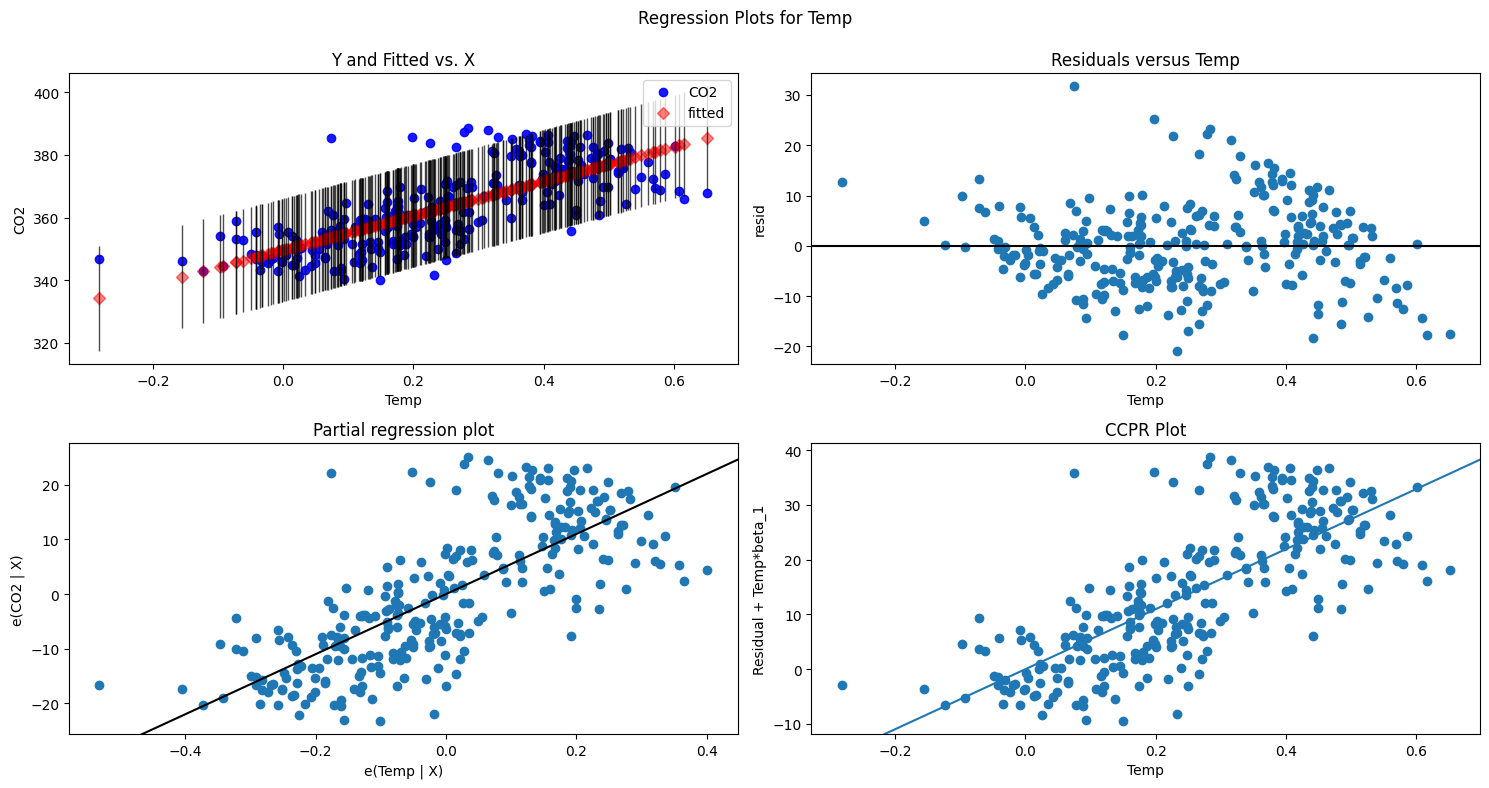

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(co2_temp_model, "Temp", fig=fig)

##Conclusion


Based on the data and regression analysis that was conducted in this segment, we have determined that there is a significance in the relationship. This supports our initial hypothesis and further scientific research on this area, which we will expound on below. 

- CO2 (carbon dioxide) is a greenhouse gas, which means it absorbs and re-emits infrared radiation from the Earth's surface, trapping heat in the atmosphere. This process is known as the greenhouse effect.

- When CO2 concentrations increase in the atmosphere, more heat is trapped, leading to a warming of the Earth's surface and the lower atmosphere. This effect is largely due to human activities, such as the burning of fossil fuels for energy and transportation, which has increased exponentially over the years.

As such, we can conclude with strong scientific evidence supporting the idea that increasing CO2 concentrations contributes to a warming of the Earth.

However, whilst there is certainly a significance in the relationship, further investigation of the data in Phase II would be needed to determine if the relationship is valid as a result of the high standard error value and the lower r-squared value we have obtained.


##Bivariate Analysis Of Relationship Between Methane And Temp

In this section, we are keen to investigate a possible relationship between Methane emission levels and temperature increments.

Both the variables that we are working with are numerical hence we will be using the numerical-numerical bivariate data analysis method.

**The working hypothesis for the relationship is that an increased level of methane emissions in the environment would lead to a positive rate of change of temperature.**


Another hypothesis we have come up with is that the increased level of CH4 leads to an increase in rate of change of temperature as denoted by variable "temp".

Since temperature and CH4 are both numerical data as such we will be using the numerical - numerical bivariate analysis.

<Axes: xlabel='CH4', ylabel='Temp'>

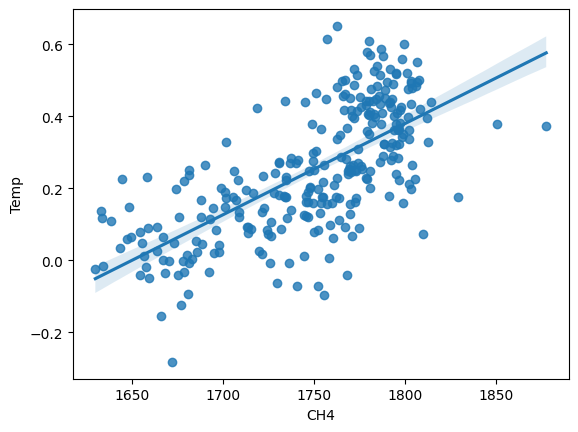

In [ ]:
#Extracting CH4 and Temperature
sns.regplot(x = df["CH4"], y= df["Temp"])

From the best-fit line above, we can preliminarily tell that Temperature & CH4 levels are positively correlated. 

Regression Analysis For Bivariate Relationship Between Temp And CH4 Levels.


In [ ]:
#Creating A Linear Regression Object From scikit
lin = LinearRegression()
lin.fit(df[["CH4"]], df[["Temp"]])
lin.score(df[['CH4']], df['Temp'])

0.46180980799350313

Based on the regression analysis that was done above, we were returned a score (which is the r^2 value that was mentioned in class) of 0.462 which confirms that both the CH4 levels and temperature share some form of relationship with each other and has a variance of about 46%.

To confirm the regression analysis was done correctly, we use another plugin, 'statsmodel' to verify that the linear regression was done correctly.

In [ ]:
ch4_temp_model = ols("CH4 ~ Temp", data=df).fit()
ch4_temp_model_summary = ch4_temp_model.summary()
HTML(
(ch4_temp_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

To understand the output, we will zoom in on several key values:

<font color='#aec7e8'>Adjust R Squared: </font> Also known as the coefficient determination. Based on this we can tell that 46.2% of the changes in the "Temp" variable can be attributed to changes in CH4 levels.

<font color='#ffbb78'>Coefficient: </font> This value indicates that for every unit of increase in "Temp" there would be an increase of 182.4572% in CH4 levels recorded.

<font color='#c7e9c0'>Standard Error: </font> Standard error measures the accuracy of the coefficient against other samples of the data within the sample set. Our error rate is relatively high, which could indicate that the relationship may not be as accurate, but further checks would be needed to prove or disprove this.

<font color='#bcbddc'>P Value </font> The p-value indicates whether the relationship is statistically significant. In this case the p-value of 0 is lower than the generally accepted value of 0.05, which indicates that this relationship is statistically significant.

<font color='#ff9896'>Confidence Interval </font> The confidence interval is a range in which the coefficient is likely to fall. We can be 95% confident that the "Temp" coefficient will be within the interval of 159.328 and 205.587.

Graphical Representation Of The CH4 and Temp Relationship

eval_env: 1


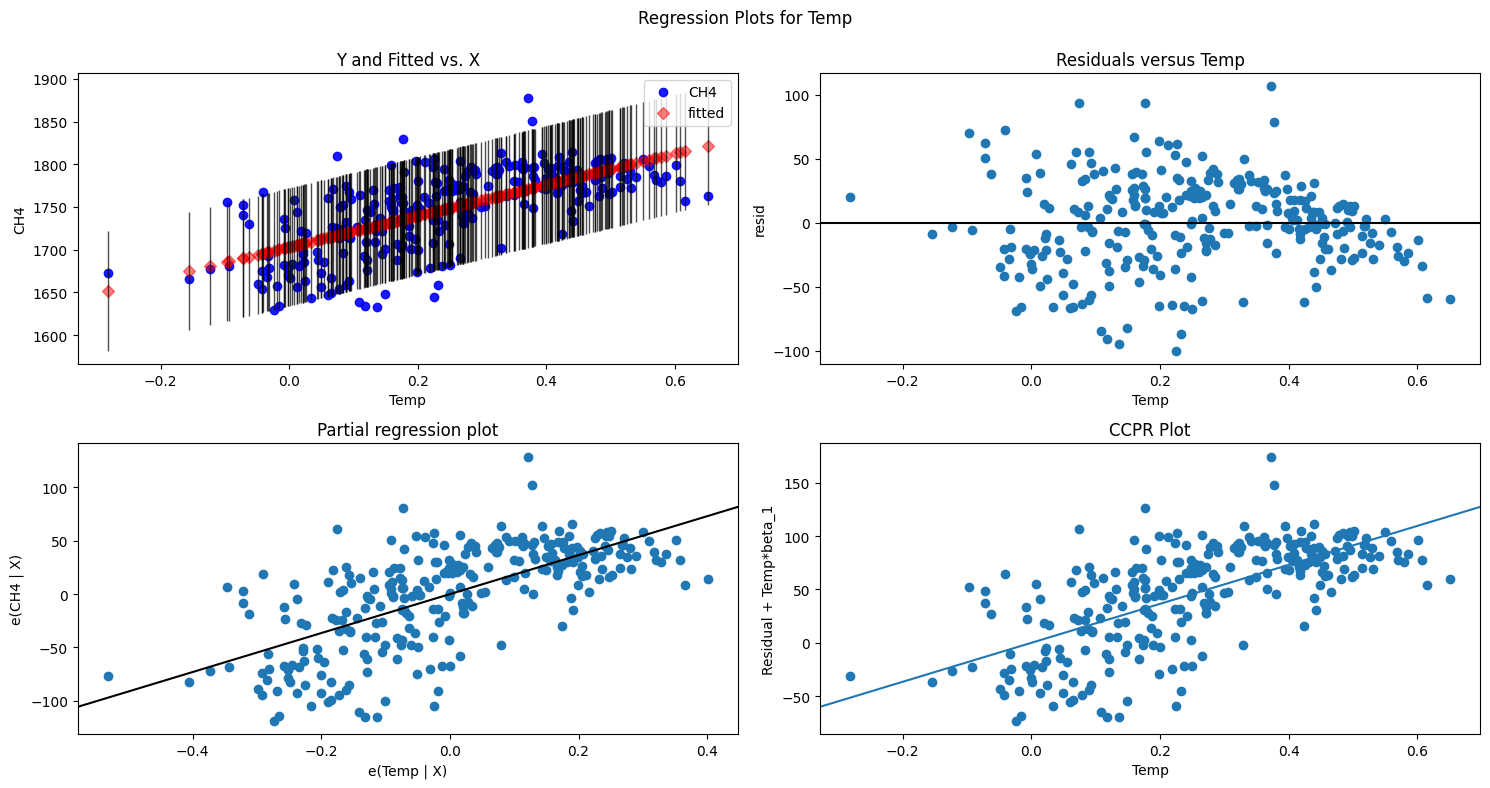

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ch4_temp_model, "Temp", fig=fig)

##Conclusion

Based on the data and regression analysis that was conducted in this segment, we have determined that there is a significance in the relationship. This supports our initial hypothesis and further sicentific research on this area, which we will expound on below. 

- Like CO2, methane is a greenhouse gas that absorbs and re-emits infrared radiation, trapping heat in the Earth's atmosphere. This process leads to a warming of the Earth's climate.

- As temperatures rise, methane can be released from melting permafrost, and from methane hydrates trapped in the ocean floor. This creates a feedback loop, where the release of methane leads to further warming, which in turn releases more methane, which further increases temperature, and the cycle continues.

-  Human activities, such as agriculture and industrial processes, also contribute to methane emissions. For example, rice cultivation and livestock farming both produce significant amounts of methane. Methane is also released during the production and transportation of fossil fuels.

As such, we can conclude with strong scientific evidence supporting the idea that increasing CH4 concentrations contributes to warming of the Earth.

However, whilst there is certainly a significance in the relationship, further investigation of the data in Phase II would be needed to determine if the relationship is valid as a result of the high standard error value and the lower r-squared value we have obtained.

##Bivariate Analysis For The Relationship Between MEI and Temp

In this section, we are keen to investigate a possible relationship between MEI (Multivariate El Nino Southern Oscillation Index) and Temperature increases. 

The two variables are both numerical and this means that we will be using the numerical-numerical bivariate data analysis method. 

**The working hypothesis for the relationship between these two variables would be that fluctuations in the MEI Index would be positively correlated and have an impact on the temperature increases observed.**


<Axes: xlabel='MEI', ylabel='Temp'>

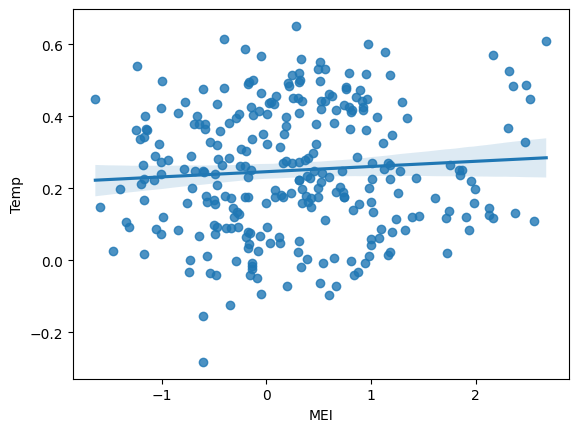

In [ ]:
sns.regplot(x=df["MEI"], y=df["Temp"])

From the best fit line that was created above, we can infer that there is no correlation between the MEI and Temperature increases as the scatter plots are very dispered in the diagram shown above.

In [ ]:
#Creating A Linear Regression Object From scikit
lin = LinearRegression()
lin.fit(df[["MEI"]], df[["Temp"]])
lin.score(df[['MEI']], df['Temp'])

0.0054555617016393

##Conclusion

Based on the calculation of the coefficient determination above, it can be inferred as a result of the low coefficient determination of 0.005 that it's quite likely that this pair of variables may not share any significant relationship. After some research, we have found several viable reasons why this is so.

MEI primarily measures short-term climate variability in the tropical Pacific region. While it can affect global temperatures, its impact is typically limited to the period of the ENSO event, which usually lasts for a few months to a year.

Furthermore, while ENSO can have a significant impact on regional climate patterns, its impact on global temperatures may be more limited. For example, a strong El Niño event may lead to warmer temperatures in some regions while cooler temperatures in others. Hence, the overall net effect on global temperatures may be cancelled out by these regions.

#Bivariate Analysis For The Relationship Between CFC-12 and Temp

To start off the process, we have come out with a hypothesis for this relation that the increased level of CFC-12 in the atmosphere leads to a positive rate of change of temperature as denoted by the variable "Temp".

Since temperature and CFC-12 are both numerical data as such we will be using the numerical - numerical bivariate analysis.

<Axes: xlabel='CFC-12', ylabel='Temp'>

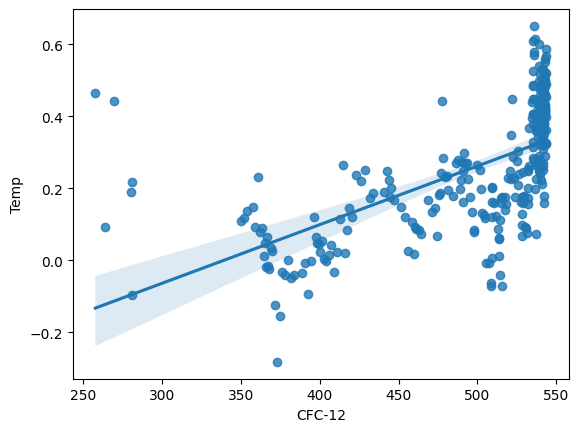

In [ ]:
#Extracting CFC-12 and Temperature
sns.regplot(x=df["CFC-12"], y=df["Temp"])

Based on the best-fit line above, we can infer that there is a positive correlation between CFC-12 and Temp.

However, we note that there is a significant number of data points on the rightmost side of the graph, with many points being a great distance away from the best-fit line.

###Regression Analysis For Bivariate Relationship Between CFC-12 and Temp

In the previous step we created a scatter plot using the two variables and from there we were able to tell that the two variables are positively correlated.
The next step would be to carry out regression analysis on the two data variables to investigate deeper into the underlying relationship between the two variables. 

The outcome of regression analysis would be to obtain the equation of the line and to also obtain the correlation coefficient.

In [ ]:
#Creating A Linear Regression Object From scikit
lin = LinearRegression()
lin.fit(df[["CFC-12"]], df[["Temp"]])
lin.score(df[['CFC-12']], df['Temp'])

0.36616340871131137

Based on the regression analysis that was done above, we were returned a score (which is the r^2 value that was mentioned in class) of 0.366 which confirms that both the CO2 levels and temperature share some form of relationship with each other and has a variance of about 37%.

To confirm the regression analysis was done correctly, we use another plugin, 'statsmodel' to verify that the linear regression was done correctly.

In [ ]:
temp_df = df.copy()
temp_df.rename(columns={"CFC-12": "CFC12"}, inplace=True)
CFC12_model = ols("CFC12 ~ Temp", data=temp_df).fit()
CFC12_summary = CFC12_model.summary()
HTML(
  (CFC12_summary 
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

To understand the output, we will zoom in on several key values:

<font color='#aec7e8'>Adjust R Squared: </font> Also known as the coefficient determination. Based on this we can tell that 36.4% of the changes in the "Temp" variable can be attributed to changes in CFC-12 levels.

<font color='#ffbb78'>Coefficient: </font> This value indicates that for every unit of increase in "Temp" there would be an increase of 0.0025% in CFC-12 levels recorded.

<font color='#c7e9c0'>Standard Error: </font> Standard error measures the accuracy of the coefficient against other samples of the data within the sample set. Our error rate is relatively high, which could indicate that the relationship may not be as accurate, but further checks would be needed to prove or disprove this.

<font color='#bcbddc'>P Value </font> The p-value indicates whether the relationship is statistically significant. In this case the p-value of  (insert data here) is lower than the generally accepted value of 0, which indicates that this relationship is statistically significant.

<font color='#ff9896'>Confidence Interval </font> The confidence interval is a range in which the coefficient is likely to fall. We can be 95% confident that the "Temp" coefficient will be within the interval of 0.001 and 0.002.

### Graphical Representation Of The CFC-12 and Temp Relationship
This segment will display the visual representation of the relationship that was computed as part of the regression analysis process.

eval_env: 1


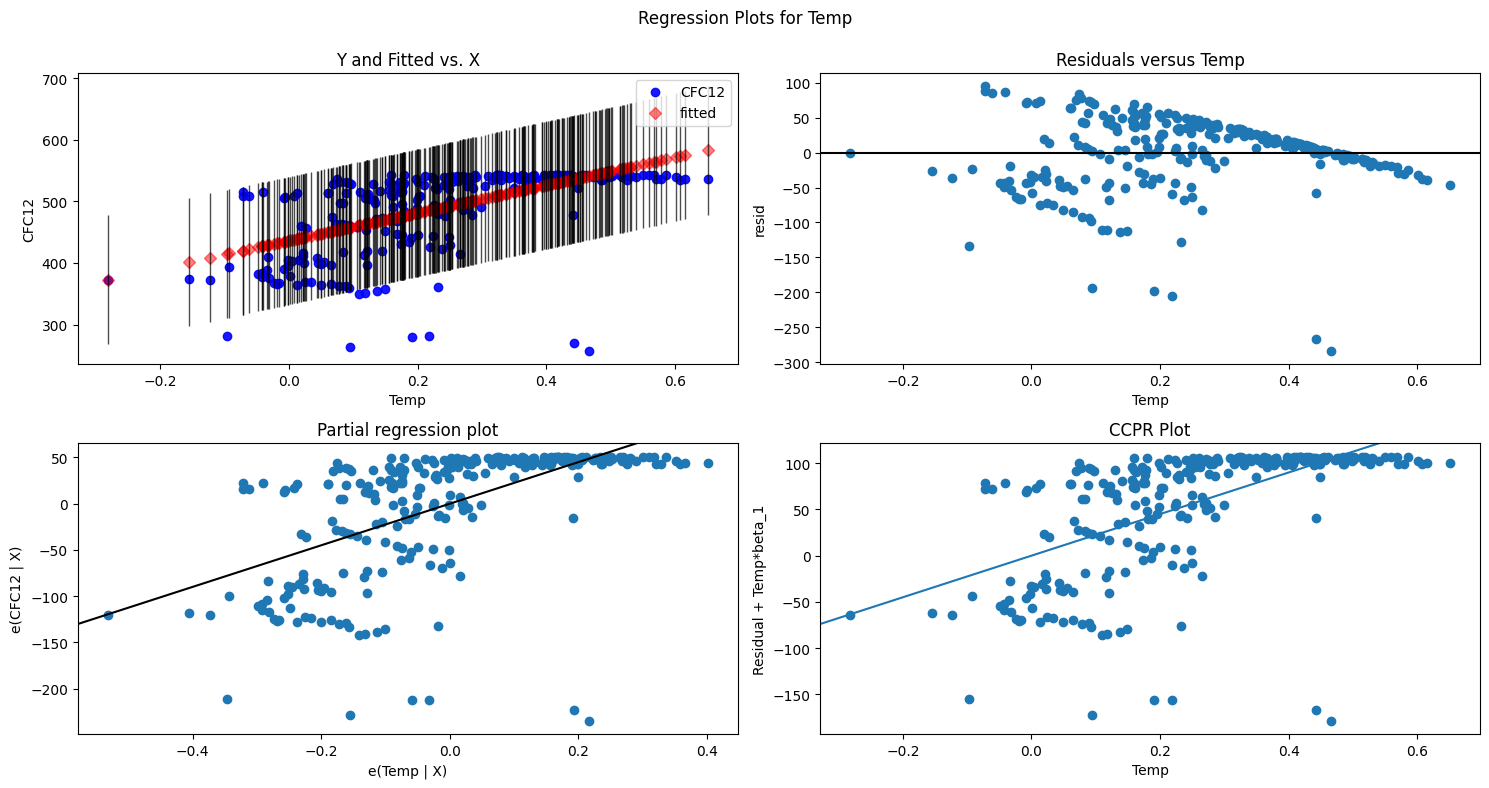

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(CFC12_model, "Temp", fig=fig)

##Conclusion

The above results point to a weak positive correlation between CFC-12 and Temp, while the relatively high standard error indicates that several other factors may be involved in the changes. However, the results are statistically significant, which indicates that it is unlikely that they are correlated by chance. 

A possible reason for this relationship can be drawn from the nature of concentrations of CFC-12 in the atmosphere and its relevant chemical reactions. CFC-12 absorbs and re-emits infrared radiation from the Earth's surface, leading to increased temperatures. CFC-12 then undergoes photolysis under warm temperatures, which further increases the concentration of CFC-12, resulting in a positive feedback loop. 

The increase in temperature is only slight, however, as despite being a greenhouse gas, CFC-12 is relatively low in concentration when compared with other more prevalent greenhouse gases such as CO2. This may explain the weak - instead of strong - positive correlation between CFC-12 and Temp.

#Bivariate Analysis For The Relationship Between CFC-11 and Temp

Referring to the previous section of CFC/ Temp bivariate analysis results, we offer a hypothesis that the increased level of CFC-11 leads to a positive rate of change of temperature as denoted by variable "Temp".

Since temperature and CFC-11 are both numerical data as such we will be using the numerical - numerical bivariate analysis.

<Axes: xlabel='CFC-11', ylabel='Temp'>

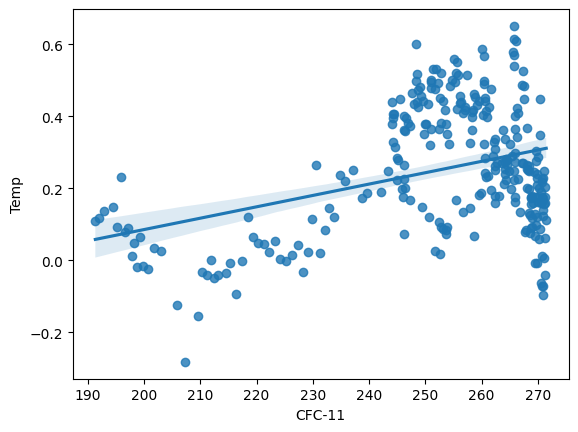

In [ ]:
#Extracting CFC-11 and Temperature
sns.regplot(x = df["CFC-11"], y= df["Temp"])

From the best fit line that was created above, we can infer that there is little to no correlation between CFC-11 and Temperature as the scatter plot points are extremely dispersed.

In [ ]:
#Creating A Linear Regression Object From scikit
lin = LinearRegression()
lin.fit(df[["CFC-11"]], df[["Temp"]])
lin.score(df[['CFC-11']], df['Temp'])

0.12877364195942864

##Conclusion

Based on the calculation of the coefficient determination above, it can be inferred as a result of the low coefficient determination of 0.011493 that it's quite likely that this pair of variables may not share any significant relationship. But what are the potential reasons why?

While CFC-11 is a potent greenhouse gas, its concentrations in the atmosphere are relatively low compared to other greenhouse gases like carbon dioxide (CO2) and methane (CH4). As a result, the direct effect of CFC-11 on global temperatures is relatively small.

Futhermore, the main impact of CFCs is their contribution to the depletion of the ozone layer. Ozone depletion and climate change are linked in a number of ways, but ozone depletion is not a major cause of climate change, and thus does not increase global temperatures significantly.

#Bivariate Analysis For The Relationship Between N2O And Temp

The types of data that is being used in this relationship would be N2O (which is categorical in nature) and Temp (which is numerical in nature). And this means that we would need to carry out Categorical-Numerical Bivariate Analysis.

**Our working assumption of the relationship would be that a higher level of N2O present in the atmosphere could potentially lead to positive rate of change of temperature.**

In [ ]:
##As N20 Levels are categorical we would need to carry out further processing in the form of one-hot encoding in order to benchmark and analyze this variable.
n20_df = df[['N2O']].copy()
temp_df = df[['Temp']].copy()
combined_df = pd.concat([n20_df, temp_df], axis=1)
df3 = pd.get_dummies(combined_df, columns=["N2O"])
df3

,Temp,N2O_H,N2O_L
0,0.109,0,1
1,0.118,0,1
2,0.137,0,1
4,0.149,0,1
5,0.093,0,1
...,...,...,...
303,0.407,0,1
304,0.378,0,1
305,0.440,0,1
306,0.394,0,1


In [ ]:
#Creating A Linear Regression Object From scikit
lin = LinearRegression()
lin.fit(df3[['N2O_H']], df3[["Temp"]])
lin.score(df3[['N2O_H']], df3['Temp'])

0.0031595210774464366

In [ ]:
n2ol_temp_model = ols("N2O_L ~ Temp", data=df3).fit()
n2ol_temp_model_summary = n2ol_temp_model.summary()
HTML(
(n2ol_temp_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [ ]:
n2oh_temp_model = ols("N2O_H ~ Temp", data=df3).fit()
n2oh_temp_model_summary = n2oh_temp_model.summary()
HTML(
(n2oh_temp_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

Based on the data calculated above, we have determined that there is unlikely to be a strong relationship between the N2O levels and temperature increase as evidenced by the higher p-value (0.346 > 0.05) this is further backed up by the low r-squared value. Therefore, further investigation would be needed to ascertain the usefulness (or presence) of this relationship. 

#Bivariate Analysis Of The Relationship Between TSI & Temp

The types of data that is being used in this relationship would be TSI & Temp. TSI is categorical in nature whereas Temp is numerical in nature. And this means that we would need to carry out Categorical-Numerical Bivaritate Analysis.

**Our working hypothesis of the relationship would be that the fluctuations in TSI levels could partially influence the rate of change of temperature.**


In [ ]:
##As TSI Levels are categorical we would need to carry out further processing in the form of one-hot encoding in order to benchmark and analyze this variable.
tsi_df = df[['TSI']].copy()
temp_df = df[['Temp']].copy()
combined_df = pd.concat([tsi_df, temp_df], axis=1)
df3 = pd.get_dummies(combined_df, columns=["TSI"])
df3

,Temp,TSI_H,TSI_L,TSI_M
0,0.109,0,0,1
1,0.118,0,0,1
2,0.137,0,0,1
4,0.149,0,0,1
5,0.093,0,0,1
...,...,...,...,...
303,0.407,0,1,0
304,0.378,0,1,0
305,0.440,0,1,0
306,0.394,0,1,0


In [ ]:
#Creating A Linear Regression Object For TSI_L From scikit
lin = LinearRegression()
lin.fit(df3[['TSI_L']], df3[["Temp"]])
lin.score(df3[['TSI_L']], df3['Temp'])

0.05455355999805267

In [ ]:
#Creating A Linear Regression Object For TSI_L From scikit
lin = LinearRegression()
lin.fit(df3[['TSI_M']], df3[["Temp"]])
lin.score(df3[['TSI_M']], df3['Temp'])

0.028799790127841285

In [ ]:
#Creating A Linear Regression Object For TSI_L From scikit
lin = LinearRegression()
lin.fit(df3[['TSI_H']], df3[["Temp"]])
lin.score(df3[['TSI_H']], df3['Temp'])

0.00339317744438028

In [ ]:
tsiHigh_temp_model = ols("TSI_H ~ Temp", data=df3).fit()
tsiHigh_temp_model_summary = tsiHigh_temp_model.summary()
HTML(
(tsiHigh_temp_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [ ]:
tsiM_temp_model = ols("TSI_M ~ Temp", data=df3).fit()
tsiM_temp_model_summary = tsiM_temp_model.summary()
HTML(
(tsiM_temp_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [ ]:
tsiL_temp_model = ols("TSI_L ~ Temp", data=df3).fit()
tsiL_temp_model_summary = tsiL_temp_model.summary()
HTML(
(tsiL_temp_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

eval_env: 1


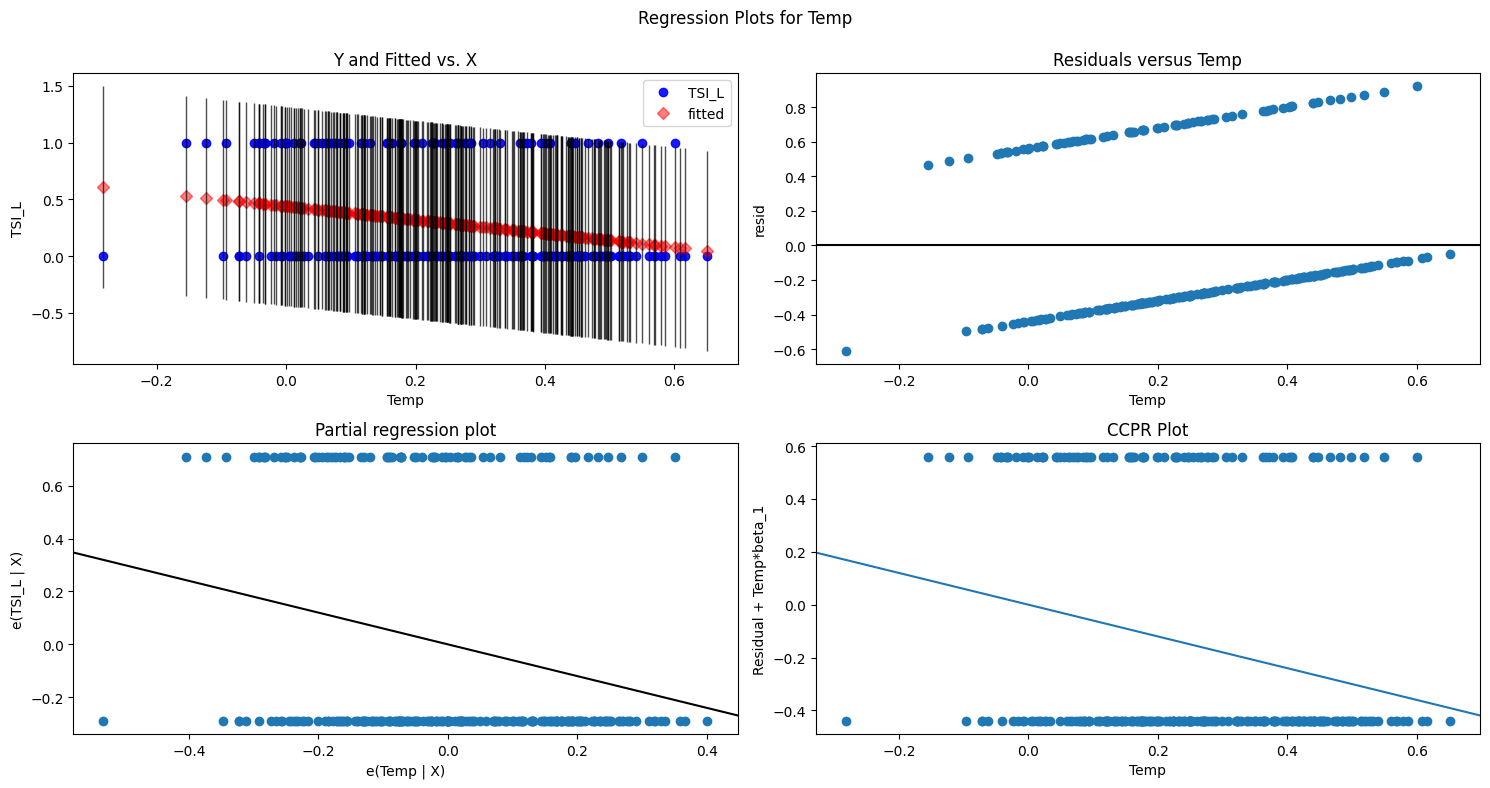

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(tsiL_temp_model, "Temp", fig=fig)

eval_env: 1


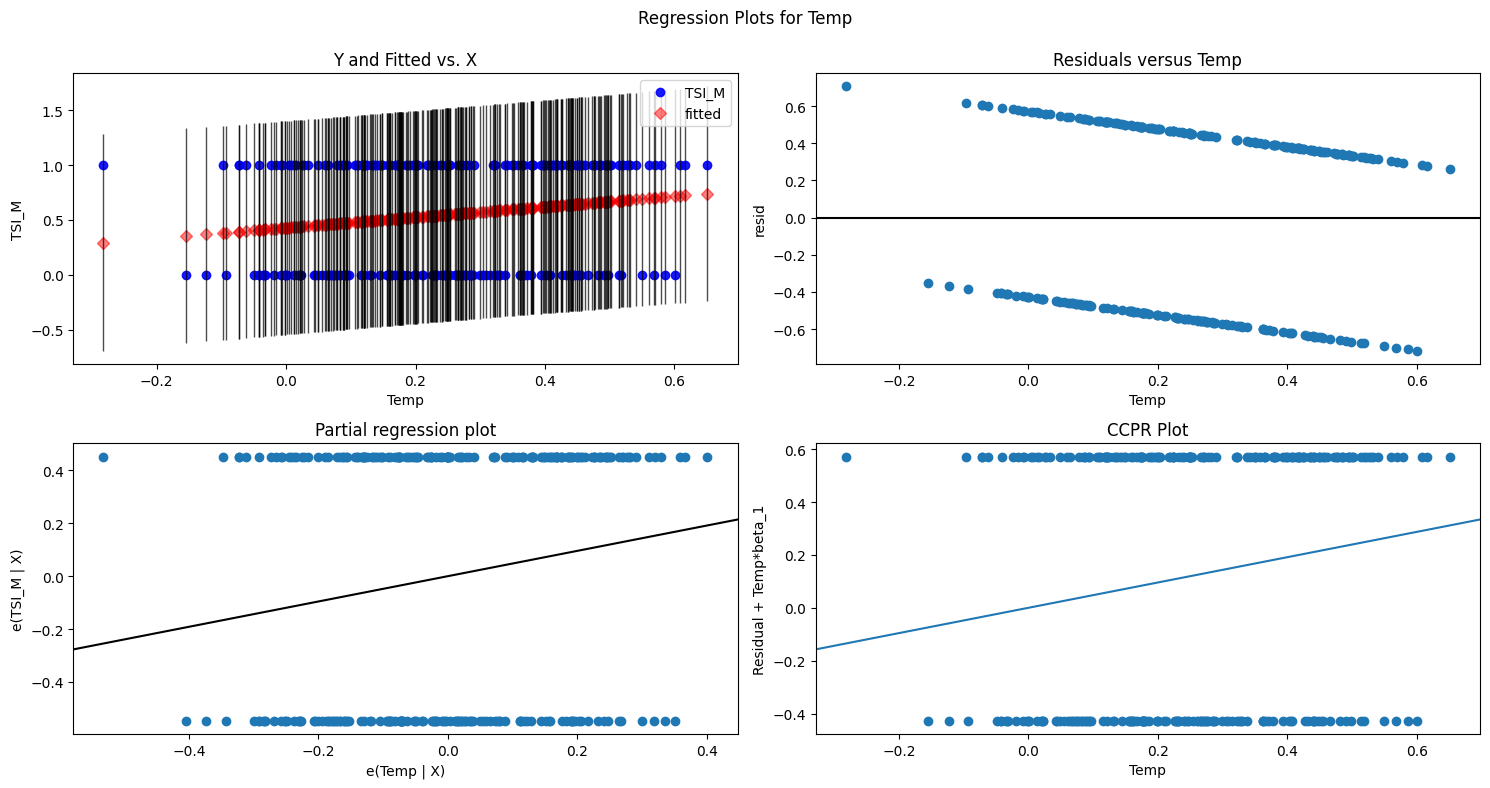

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(tsiM_temp_model, "Temp", fig=fig)

Based on the calculations above, we can tell that there is a certain degree of relationship between TSI levels and Temp Levels. There are 2 sub-relationships that are of particular interest, namely the relationship between TSI_L & TSI_Temp as well as TSI_M & TSI_Temp as these relationships have low P-Values which indicates that they are significant relationships. 

# Bivariate Analysis Of The Relationship Between Aerosols And Temp

In this section, we are keen to investigate the relationship between Aerosols and Temp.

The two variables that we are investigating are of a different type, "Aerosols" is a Categorical Data whereas "Temp" is a numerical data, as such we would be using the categorization-numerical bivariate data analysis method.

The working hypothesis is that an increased level of Aerosol would lead to negative rate of change of temperature.

In [ ]:
##As Aerosol Levels are categorical we would need to carry out further processing in the form of one-hot encoding in order to benchmark and analyze this variable.
aerosols_df = df[['Aerosols']].copy()
temp_df = df[['Temp']].copy()
combined_df = pd.concat([aerosols_df, temp_df], axis=1)
df3 = pd.get_dummies(combined_df, columns=["Aerosols"])
df3

,Temp,Aerosols_H,Aerosols_L,Aerosols_M
0,0.109,1,0,0
1,0.118,1,0,0
2,0.137,1,0,0
4,0.149,1,0,0
5,0.093,1,0,0
...,...,...,...,...
303,0.407,0,1,0
304,0.378,0,0,1
305,0.440,0,0,1
306,0.394,0,0,1


In [ ]:
#Creating A Linear Regression Object For Aerosols_H From scikit
lin = LinearRegression()
lin.fit(df3[['Aerosols_H']], df3[["Temp"]])
lin.score(df3[['Aerosols_H']], df3['Temp'])

0.18231931005841873

<Axes: xlabel='Aerosols_H', ylabel='Temp'>

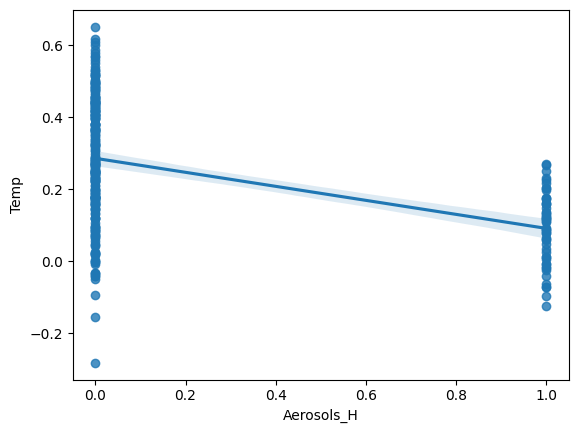

In [ ]:
sns.regplot(x=df3["Aerosols_H"], y=df3["Temp"])

In [ ]:
#Creating A Linear Regression Object For Aerosols_M From scikit
lin = LinearRegression()
lin.fit(df3[['Aerosols_M']], df3[["Temp"]])
lin.score(df3[['Aerosols_M']], df3['Temp'])

0.0734965269992135

<Axes: xlabel='Aerosols_M', ylabel='Temp'>

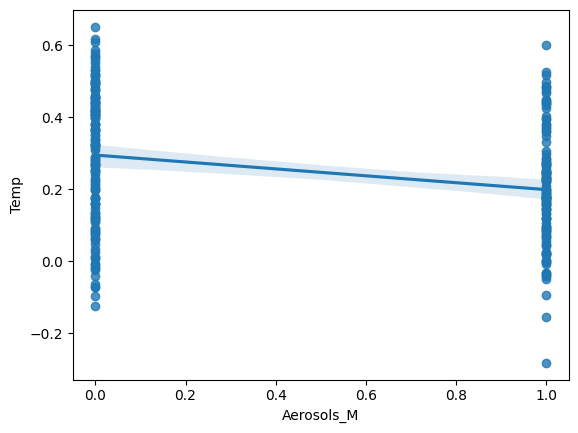

In [ ]:
sns.regplot(x=df3["Aerosols_M"], y=df3["Temp"])

In [ ]:
#Creating A Linear Regression Object For Aerosols_L From scikit
lin = LinearRegression()
lin.fit(df3[['Aerosols_L']], df3[["Temp"]])
lin.score(df3[['Aerosols_L']], df3['Temp'])

0.39730235191250396

<Axes: xlabel='Aerosols_L', ylabel='Temp'>

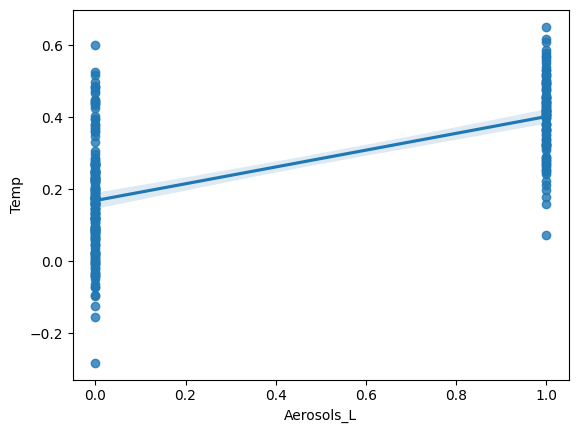

In [ ]:
sns.regplot(x=df3["Aerosols_L"], y=df3["Temp"])

In [ ]:
aerosolHigh_temp_model = ols("Aerosols_H ~ Temp", data=df3).fit()
aerosolHigh_temp_model_summary = aerosolHigh_temp_model.summary()
HTML(
(aerosolHigh_temp_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [ ]:
aerosolMedium_temp_model = ols("Aerosols_M ~ Temp", data=df3).fit()
aerosolMedium_temp_model_summary = aerosolMedium_temp_model.summary()
HTML(
(aerosolMedium_temp_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [ ]:
aerosolLow_temp_model = ols("Aerosols_L ~ Temp", data=df3).fit()
aerosolLow_temp_model_summary = aerosolLow_temp_model.summary()
HTML(
(aerosolLow_temp_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

##Conclusion


Based on the findings above as well as scientific evidence/research we conclude that it is likely that there is a relationship between Aerosol Levels in the atmosphere and the increment of temperatures as the P Values are consistently 0 and this further supports that the relationship between Aerosol Levels And Temperature is indeed significant.

Aerosols can reflect sunlight back into space, thus cooling the planet. This is known as the direct effect of aerosols.

However, aerosols can also absorb and scatter incoming solar radiation, trapping the heat in the atmosphere and warming the planet. Additionally, aerosols can also alter cloud properties, affecting the reflectivity and lifetime of clouds, which can further affect the Earth's energy balance. This is known as the indirect effect of aerosols. This may be the reason why an increase in aerosol levels results in a slower decrease in temperature, relative to the magnitude of increase in temperature caused by CO2 and methane.

eval_env: 1


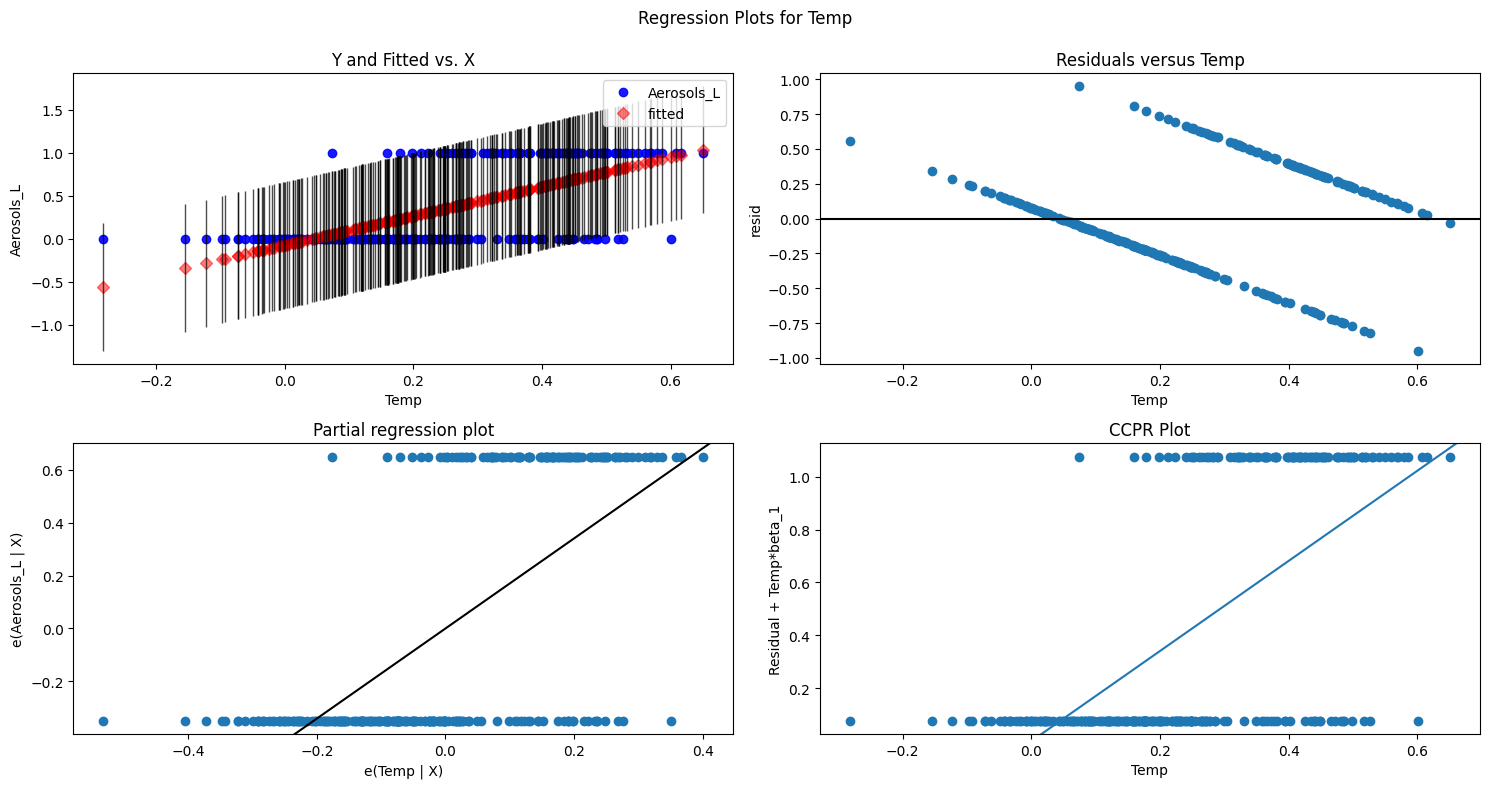

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(aerosolLow_temp_model, "Temp", fig=fig)

eval_env: 1


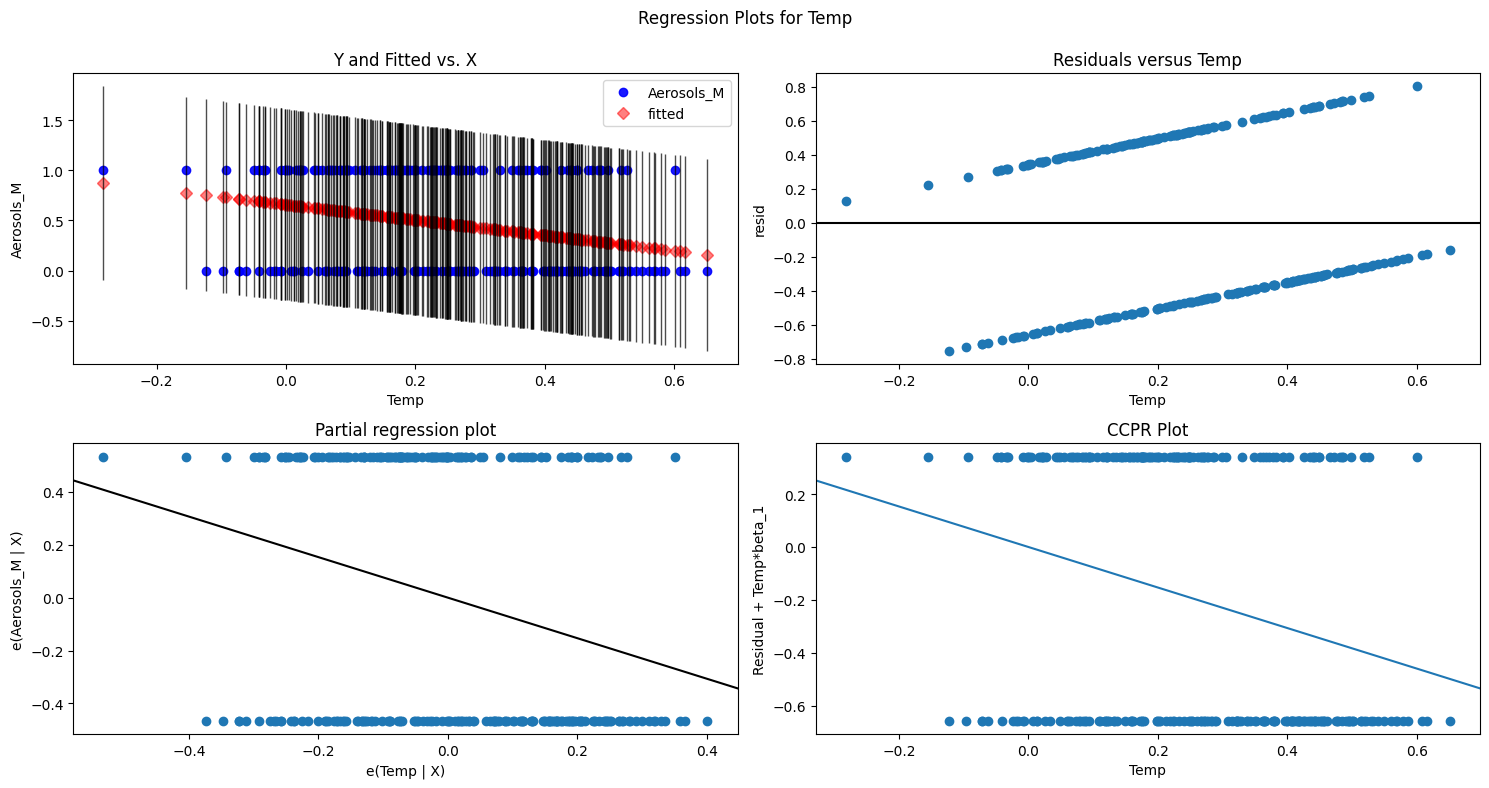

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(aerosolMedium_temp_model, "Temp", fig=fig)

eval_env: 1


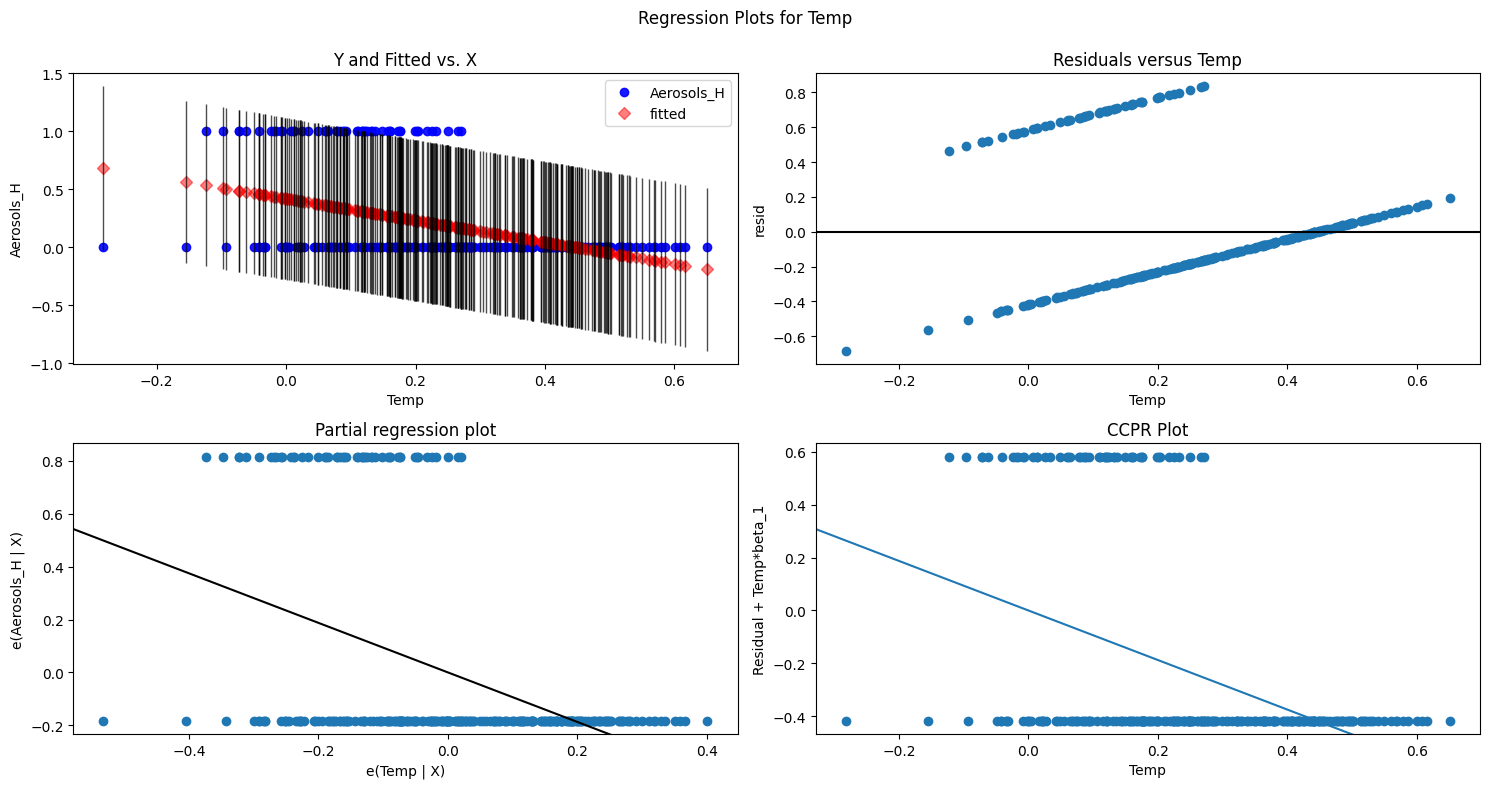

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(aerosolHigh_temp_model, "Temp", fig=fig)

#Conclusions Of EDA 

Based on the EDA process that was carried out in the section above, we have identified several relationship pairs such as (CO2-Temp, Methane-Temp, CFC-12-Temp, TSI-Temp and Aerosol-Temp) that are of interest and we would investigate and delve into them deeper in Phase 2 to confirm and draw further meaningful insights/conclusions from them.

# 1. Problem Formulation
## Regression Problem - Investigating Temperature
As the Earth's temperature continues to rise due to climate change, it is important to understand how temperatures may change in the future and why. Through accurate prediction of future temperatures, actions can be taken to mitigate these effects and best prevent detrimental effects of global warming from continuing.

This is a regression problem as temperature is numerical and continuous. For this specific problem, we will look at the factors that cause a rise in temperature. Some possible determinants include CO2 and CFC-11.

## Classification Problem - Investigating Aerosol Level
Aerosols are minute particles that are suspended in the atmosphere, such as ash from volcanoes. When there is a higher concentration of aerosols (high level of aerosols), the temperature will be lower as when these particles are sufficiently large, they scatter and absorb sunlight. Their scattering of sunlight can reduce visibility (haze) and redden sunrises and sunsets. 

Through looking at the temperatures of given years, we would be able to predict the resulting aerosol level, and determine (through further research) whether these levels could be attributed to a significant environmental event (eg. a volcanic eruption) that occurred during that time period.


### Conclusion
The **regression** problem was chosen as it is hard to pinpoint the exact factors which cause the temperatures to increase or decrease, additionally it may not solely be caused by aerosol level.

## Investigating Temperature
Problem statement: Predicting future temperatures based on features provided in the climate dataset.

Motivation: Through accurate prediction of future temperatures and evaluating which factors are most significant when it comes to rising temperature trends, we will be able to provide advise on how best these warming trends (and their detrimental effects) can be avoided.

Dependent variable: Temperature. It has an extremely important influence on life on earth and biodiversities around the world as it affects the weather patterns, ocean and polar ice caps. 

# 2. Model Training
In order to derive our models to solve the regression problem that we chose, we needed to first select suitable features to help us explain and predict future temperatures. We split the pre-existing features into categorical and numerical features respectively.




In [ ]:
# Feature Selection

# Categorical Features
# Store encoded categorical variable columns for later use in data_encoded
data_encoded = df[["TSI_Encoded", "Aerosols_Encoded", "N2O_Encoded"]]

# Drop those columns and store original columns in original
original = df.drop(["TSI_Encoded", "Aerosols_Encoded", "N2O_Encoded"], axis=1)

# Store metadata in datatypes
datatypes = original.dtypes

# Split into categorical and numerical feature metadata
categorical_features = datatypes[datatypes=="object"].index
numerical_features = datatypes[datatypes!="object"].index

## Categorical Features
For categorical features, as they were already encoded in our previous section (binary encoding for N2O and ordinal encoding for TSI and Aerosols), there was no need to re-process the data here. Instead, we plotted the distribution of the data to see whether these features would be suitable or not.

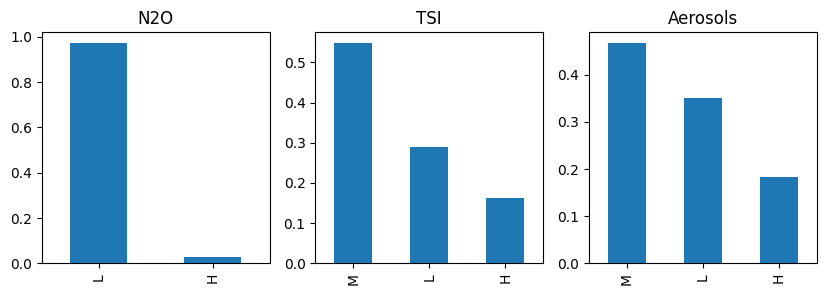

In [ ]:
# Plotting histogram of categorical_features to discern variation
n = len(categorical_features)

r, c = 1,3
fig, ax = plt.subplots(r, c, figsize=(10,3))

for i in range(n):
    feature = categorical_features[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    original[feature].value_counts(normalize=True).plot(kind='bar')

plt.show()

In order to get suitable categorical features, we assumed that if the features have a dominant value, it probably means that these features are likely to have little explanatory power on the variation of Temperature. 

Hence we did not select features where the mode had a frequency of more than 50%, or the majority of the dataset.

In [ ]:
# Get 'important' categorical features i.e. those with mode having freq < 50%
# Only Aerosols has a mode of less than 50%
categorical_important = []

for feature in categorical_features:
    highest = original[feature].value_counts(normalize=True)[0]
    if highest<0.5:
        categorical_important.append(feature)

print(f"Variables with mode contributing <50% are : {categorical_important}")

Variables with mode contributing <50% are : ['Aerosols']


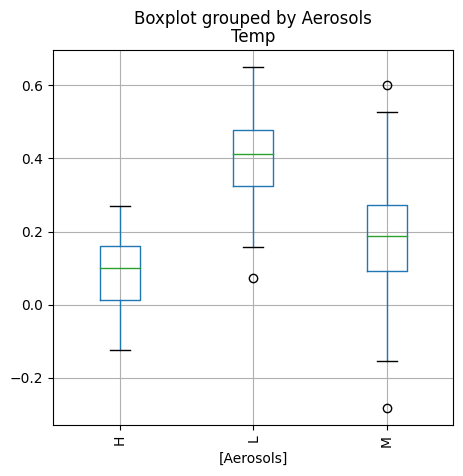

In [ ]:
# Grouped boxplot depicting the relationship between Temp and Aerosols
n = len(categorical_important)

r, c = 1,1
fig, ax = plt.subplots(r, c, figsize=(5,5))

for i in range(n):
    feature = categorical_important[::-1][i]
    ax = plt.subplot(r,c,i+1)
    original[[feature,"Temp"]].boxplot(by=feature, ax=ax, rot=90)

As a result, only Aerosols had a mode frequency of <50%, which led to us choosing it as a feature. From the grouped boxplot that we did, we also observed that there are not many Temperature outliers, hence we will leave the data as it is.

In [ ]:
# Since we have decided to only use Aerosols, we can add the Aerosols_Encoded column from our part 1 back to the dataframe
aerosols_encoded = data_encoded[["Aerosols_Encoded"]]
data = pd.concat([original, aerosols_encoded], axis=1)
data

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,Aerosols_Encoded
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109,2
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118,2
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137,2
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149,2
5,1983,10,0.002,340.30,1663.79,L,195.171,359.174,M,H,0.093,2
...,...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,L,244.200,535.072,L,L,0.407,0
304,2008,9,-0.643,383.09,1795.08,L,244.083,535.048,L,M,0.378,1
305,2008,10,-0.780,382.99,1814.18,L,244.080,534.927,L,M,0.440,1
306,2008,11,1.345,384.13,1812.37,L,244.225,534.906,L,M,0.394,1


## Numerical Features
For numerical features, we plotted a histogram to visually observe the distribution of the dataset and their relationships with our response variable, Temperature.

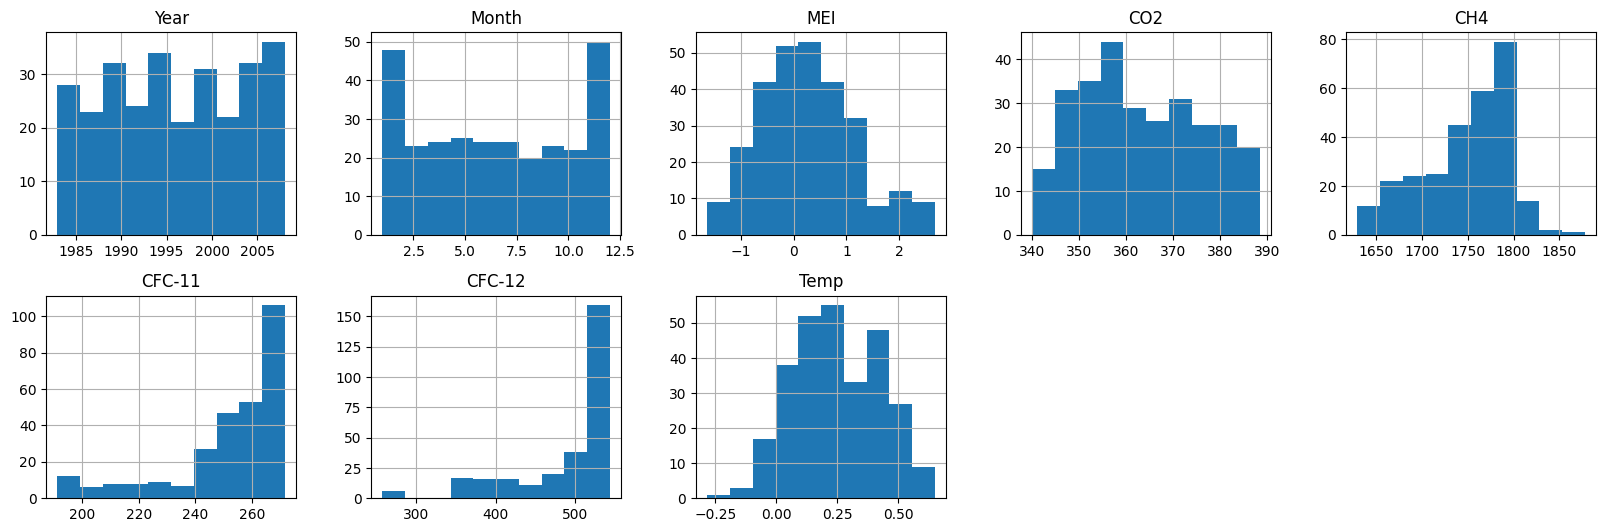

In [ ]:
# Numerical Features
# Histogram to help us discern the variation of the numerical variables
data[numerical_features].hist(layout=(9,5), figsize=(20,30))

plt.show()

Based on visual inspection of the histograms, year does not vary much and does not have much explanatory power on the Temperature, as Temperature is decided through a variety of factors such as CO2 and CFC levels which are not intrinsically linked to year but are correlated with the year. 

We thus decided to not select year as one of the features, or make any new features with regards to year as we thought it might be misleading and/or vague.

In [ ]:
# Based on a visual inspection of the histograms, year is dominated by a comparatively small range of values,
# Hence we drop year from our analysis

# Create a correlation table
features_selected = ["Temp", "Month", "MEI", "CO2", "CH4", "CFC-11", "CFC-12"]
data[features_selected].corr()

,Temp,Month,MEI,CO2,CH4,CFC-11,CFC-12
Temp,1.000000,-0.084800,0.073862,0.759713,0.679566,0.358850,0.605114
Month,-0.084800,1.000000,0.024307,-0.090648,0.000618,-0.012433,0.020672
MEI,0.073862,0.024307,1.000000,-0.147371,-0.106818,0.060471,-0.063378
CO2,0.759713,-0.090648,-0.147371,1.000000,0.838535,0.370151,0.684874
CH4,0.679566,0.000618,-0.106818,0.838535,1.000000,0.650508,0.785975
CFC-11,0.358850,-0.012433,0.060471,0.370151,0.650508,1.000000,0.679192
CFC-12,0.605114,0.020672,-0.063378,0.684874,0.785975,0.679192,1.000000


We then created a heatmap to observe the correlation coefficients between Temp and our numerical variables, where the darker the shade represents lower correlation and the lighter shades represents higher correlation.

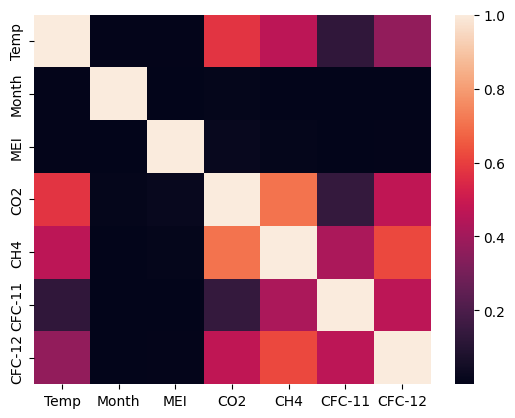

In [ ]:
# Create correlation heatmap to see correlation of Temp with our independent variables
# The darker the shade the lower the correlation
# It is observed that MEI is not strongly correlated with temperature
import seaborn as sns
r2 = data[features_selected].corr()**2
sns.heatmap(r2)
plt.show()

We were able to determine 3 features that had relatively high (>50%) correlations with Temp, being CO2, CH4 and CFC-12.

In [ ]:
# Function returns all columns in combined_data which are 'highly' correlated to target
# Definition of 'high' correlated given by parameter threshold (0.5)

def corr_features(data, target, threshold):
    corr_features = []
    for feature in data.columns:
        if feature==target: continue
        x = data[feature]
        y = data[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected = corr_features(data[features_selected], 'Temp', 0.5)
print(f"updated selected features: {features_selected}")

updated selected features: ['CO2', 'CH4', 'CFC-12']


We then checked the correlations between these variables themselves, to which we found that CO2 and CH4 are highly correlated (>50%) with one another. 

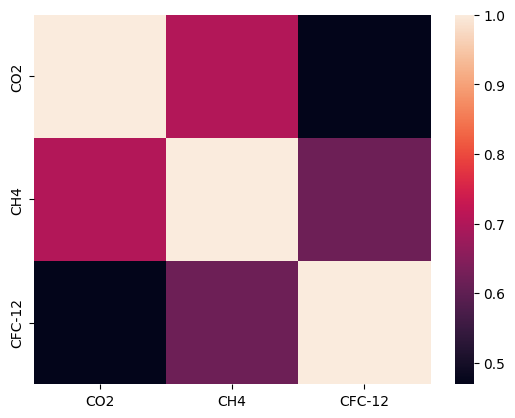

In [ ]:
# check that our selected features are not correlated among each other
# copy of initial selected features
all_select = features_selected.copy()
r2 = data[features_selected].corr()**2
sns.heatmap(r2)
plt.show()

However, we decided to leave these highly correlated features in when training and testing our models. The main rationale behind this is that there is no joint cause which accounts for a rise in CO2, CH4 and CFC-12. 

According to the United States Environmental Protection Agency, CO2 enters the atmosphere through burning fossil fuels, solid waste, trees and other biological materials, while methane is emitted during the production and transport of coal, natural gas and oil. Fluorinated gases are also produced through different processes, such as through using various household, commericial and industrial applications.

We have deduced that there is no link between how these different gases are produced, therefore the correlation coefficient between them may be misleading and may not elude to the fact that the increased production of these gases may be due to international trends such as increased consumption worldwide.

# 3. Model Evaluation and Selection
We chose to use 2 different models for our model fitting, both with their own pros and cons. We decided to split our data into training and testing data following a 80:20 ratio at random, as we thought that this would be the best way to ensure that the model that we trained would not be biased. 

This ensured that our model would be as accurate as possible as there are significant differences between temperatures from different parts of the dataset.


In [ ]:
# Model Building

# Linear Regression and Ridge Regression (train_test_split)

all_select.append("Aerosols_Encoded")
from sklearn.model_selection import train_test_split

X = data[all_select]
y = data[["Temp"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## Model 1: Linear Regression Model
LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. This will help to reduce the error of the model.

We also assumed that the features are independent, as we took out the features that are highly correlated with one another, thus this would lead to us having a better fit when using the linear regression model.

Coefficient of Determination: 0.649

In [ ]:
# Model fitting for linear regression

from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X_train, y_train)
model1_r2 = model1.score(X_train, y_train)
coef1 = model1.coef_
bias1 = model1.intercept_

print("Model 1: Linear Regression ")
print("--------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef1[0]}")
print(f"Intercept : {bias1[0]}")
print(f"Coeff of Determination : {model1_r2}")

Model 1: Linear Regression 
--------------------------
Features : ['CO2', 'CH4', 'CFC-12', 'Aerosols_Encoded']
Coefficients: [ 0.00641522  0.00017779  0.00040132 -0.06383793]
Intercept : -2.5409347514124034
Coeff of Determination : 0.6494307970186464



## Model 2: Ridge Regression Model
Ridge regression works by adding a penalty term to the Ordinary Least Squares (OLS) objective function, which shrinks the magnitude of the regression coefficients and helps to avoid overfitting. The penalty term is proportional to the square of the L2 norm of the regression coefficients, which encourages the model to select a set of coefficients that are small in magnitude and therefore less sensitive to small changes in the input data.

By reducing the magnitude of the regression coefficients, Ridge regression can help to reduce the impact of multicollinearity on the model estimates, and can improve the stability and reliability of the model.

Coefficient of Determination: 0.649

In [ ]:
# Model fitting for ridge regression

from sklearn.linear_model import Ridge

model2 = Ridge().fit(X_train, y_train)
model2_r2 = model2.score(X_train, y_train)
coef2 = model2.coef_
bias2 = model2.intercept_

print("Model 2: Ridge Regression")
print("-------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef2[0]}")
print(f"Intercept : {bias2[0]}")
print(f"Coeff of Determination : {model2_r2}")

Model 2: Ridge Regression
-------------------------
Features : ['CO2', 'CH4', 'CFC-12', 'Aerosols_Encoded']
Coefficients: [ 0.00644819  0.00017684  0.00040281 -0.06288412]
Intercept : -2.552806714178452
Coeff of Determination : 0.649422515686209


# 4. Findings and Conclusion


We will evaluate our models using the metric *Mean Absolute Error* (MAE) and *Root Mean Squared Error* (RMSE). In this section, we will be carrying out a series of identical tests on each of the proposed models above and the aim of this would be to identify the most accurate model that we will be using. 

**Testing Model 1**

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


y_pred = model1.predict(X_test) 
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Temp"])
rmse = mean_squared_error(y_test, y_pred, squared = False);

print("Model 1 Evaluation")
print("-----------------")
print("R^2 : ", r2_score(y_test, y_pred))
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")

Model 1 Evaluation
-----------------
R^2 :  0.5221831870771276
MAE: 0.09
MAE as % of mean: 31.8%
RMSE: 0.11


**Testing Model 2**

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = model2.predict(X_test) 
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Temp"])
rmse = mean_squared_error(y_test, y_pred, squared = False);

print("Model 2 Evaluation")
print("-----------------")
print("R^2 : ", r2_score(y_test, y_pred))
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")

Model 2 Evaluation
-----------------
R^2 :  0.5220601097561232
MAE: 0.09
MAE as % of mean: 31.8%
RMSE: 0.11


We decided to perform additional evaluations before coming to a firm conclusion on which model is truly the best. Below, we run several cross-validations to check for the best model.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Use cross_val_score to evaluate the model using k-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Compute mean and standard deviation of R^2 scores
mean_r2 = scores.mean()
std_r2 = scores.std()

# Make predictions on test data
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
ave = y_test["Temp"].mean()
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Model 1 Evaluation with Cross-Validation")
print("--------------------------------------")
print(f"Mean R^2 score: {mean_r2:.2f} +/- {std_r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")

Model 1 Evaluation with Cross-Validation
--------------------------------------
Mean R^2 score: 0.63 +/- 0.04
MAE: 0.09
MAE as % of mean: 31.8%
RMSE: 0.11


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='r2')

mean_r2 = scores.mean()
std_r2 = scores.std()

y_pred = model2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
ave = y_test["Temp"].mean()
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Model 2 Evaluation with Cross-Validation")
print("--------------------------------------")
print(f"Mean R^2 score: {mean_r2:.2f} +/- {std_r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")


Model 2 Evaluation with Cross-Validation
--------------------------------------
Mean R^2 score: 0.63 +/- 0.04
MAE: 0.09
MAE as % of mean: 31.8%
RMSE: 0.11


### Conclusion


Based on the cross-validation testings above, we conclude that Models 1 and 2 are highly similar in their performance. 

However, we ultimately decided on Model 1 as its r^2 value is slightly higher than Model 2's r^2 value.

# 5. Team Contribution
### Kevin
- Contributed to Project Phase I parts 1 and 2
- Contributed to Project Phase II parts 1, 2 and 3
- Mainly did the code for these sections, helped to annotate the code blocks accordingly

### Kumaresh
- Proofread all write-ups

### Teffy
- Contributed to Project Phase I part 3
- Contributed to Project Phase II part 4
- Ensured scientific accuracy and validity for write-ups describing the climate dataset

### Jun Jie
- Contributed to Project Phase I part 3
- Contributed to Project Phase II part 4
- Mainly did the code for the above sections

### Melanie
- Contributed to Project Phase I parts 1 and 2
- Contributed to Project Phase II parts 1, 2 and 3
- Mainly did the writeups for these sections, did research on the various datasets that were provided
- Did writeup for team contribution


# References
https://www.ncei.noaa.gov/products/climate-data-records/total-solar-irradiance

https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

https://www.learnpythonwithrune.org/a-smooth-introduction-to-linear-regression-using-pandas/

https://www.britannica.com/science/biosphere/Environmental-conditions

https://www.nasa.gov/centers/langley/news/factsheets/Aerosols.html#

https://www.epa.gov/ghgemissions/overview-greenhouse-gases#

https://scikit-learn.org/stable/modules/linear_model.html#


